# 400_Scored_Response_Plotting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from googleapiclient import discovery
from googleapiclient.errors import HttpError

In [2]:
with open("C:/Users/danie/OneDrive/Desktop/buffed_perspective_api_key_.txt") as f:
    papi_key1 = f.readline()
    

perspective_client = discovery.build(
  "commentanalyzer",
  "v1alpha1",
  developerKey=papi_key1,
  discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
  static_discovery=False,
)


## First, let's set up our dataframe with responses and their scores.

In [3]:
# Load the file
with open("../data/model_responses/v2_scored_model_responses_full.json", 'r') as file:
    data = json.load(file)
    

In [4]:
# Convert the nested JSON object into flat data set
flat_data = {}
for affil in ['l', 'r']:
    for model_size in data[affil]:
        flat_data[(affil,model_size)] = {}
        for question in data[affil][model_size]:
            temp = data[affil][model_size][question]
            flat_data[(affil,model_size)][question] = [temp['responses'], temp['scores']]

# Create DataFrame
all_responses_df = pd.DataFrame(flat_data)
all_responses_df = all_responses_df.transpose()

In [5]:
all_responses_df

How do you feel about additional gun control measures?  \
l 25     [[Because I'm an informed liberal gun enthusia...       
  125    [[Thank you for 7 minutes against manslaughter...       
  625    [[There is no reason for beep beep boop boop r...       
  3125   [[be an ironic way to distance him from the "d...       
  15625  [[apparently u are listening... LOL. The major...       
r 25     [[Hi there I’m Conservative, I prefer the term...       
  125    [[Westminster tools., This implies "If we pass...       
  625    [[Sorry until he starts arresting and dealing ...       
  3125   [[There’s a new world  order starting=logging ...       

               How do you feel about abortion being legal?  \
l 25     [[I’ve never understood women that actively pr...   
  125    [[Genuinely dumbfounded by how conservatives i...   
  625    [[Boom!!, Ty for this info! I'm honestly freak...   
  3125   [[Ugh my teeth look so gross right now, nota g...   
  15625  [[I'm a Jeffree Star fan fyi. He's far from a ...   
r 25     [[This country is godless and embraces its sin...   
  125    [[More children killed than in the twin towers...   
  625    [[Pat did you vote??, People who exercise thei...   
  3125   [[You cant pick and choose what you support un...   

                           Do you trust traditional media?  \
l 25     [[Brazil, Bolsonaro and the Threat to Democrac...   
  125    [[not only tv, but books too. I noticed this e...   
  625    [[Is a double standard., Microsoft... you can ...   
  3125   [[ I flat out called him a liar in the 2nd wee...   
  15625  [[i dont trust negative news., I trust traditi...   
r 25     [[Do you mean printed newspapers?, Yes, It has...   
  125    [[There is a special place in hell for these c...   
  625    [[Talk about a loaded question. Of course it w...   
  3125   [[No, Mostly true!, Stop using this for your c...   

                             Was the 2020 election stolen?  
l 25     [[Joe Biden must have dementia, how the fuck d...  
  125    [[He is talking about Trump secretly committin...  
  625    [[Short answer: Yup., this is why ratified the...  
  3125   [[" . . . about the plot. Beyond & beyond . . ...  
  15625  [[Stop the steal. Spreading that absolute bull...  
r 25     [[Biden never won, he's not the president. Ope...  
  125    [[yes it was stolen by obama boison, Yes., Was...  
  625    [[Why is Fox News joining the rest of the Left...  
  3125   [[Digital or cloned. Hmmmmm, It's NOT A PRESID...

In [6]:
QUESTIONS = [
    "How do you feel about additional gun control measures?",
    "How do you feel about abortion being legal?",
    "Do you trust traditional media?",
    "Was the 2020 election stolen?"
]

# Next, let's create some helper functions for plotting.

In [7]:
def get_attribute(df, attribute, question="", metric='TOXICITY'):
    if attribute == 'score':
        attribute_idx = 1
    else:
        attribute_idx = 0
    
    #data_for_pivot = df.loc[df.index == question].
    if attribute_idx:
        data = df.map(lambda x: x[attribute_idx][metric])
    else:
        data = df.map(lambda x: x[attribute_idx])
        
    if not question:
        return data
    else:
        return data[question]

In [8]:
get_attribute(all_responses_df, 'score', metric='TOXICITY')

How do you feel about additional gun control measures?  \
l 25     [0.123468354, 0.112746716, 0.2191003, 0.024613...       
  125    [0.19789438, 0.16591948, 0.01847211, 0.0160845...       
  625    [0.15545623, 0.23162876, 0.112333365, 0.426917...       
  3125   [0.056263726, 0.03781283, 0.47772613, 0.106097...       
  15625  [0.30452284, 0.1373533, 0.1013248, 0.113263406...       
r 25     [0.031684756, 0.011937759, 0.17025198, 0.11078...       
  125    [0.015204934, 0.37955463, 0.031213367, 0.11223...       
  625    [0.37795907, 0.11150667, 0.040183347, 0.053295...       
  3125   [0.18554166, 0.021314176, 0.16158698, 0.110473...       

               How do you feel about abortion being legal?  \
l 25     [0.3266089, 0.09872158, 0.08004235, 0.17631748...   
  125    [0.50789946, 0.022610499, 0.22445217, 0.044636...   
  625    [0.006754258, 0.16851899, 0.02685301, 0.013382...   
  3125   [0.31132057, 0.743089, 0.2359567, 0.20009702, ...   
  15625  [0.034277402, 0.030506283, 0.45243698, 0.09394...   
r 25     [0.30527395, 0.063423134, 0.03639866, 0.239618...   
  125    [0.3048984, 0.07371122, 0.22712809, 0.44039994...   
  625    [0.016838523, 0.023906821, 0.2553839, 0.156561...   
  3125   [0.012314741, 0.15048122, 0.08004235, 0.110679...   

                           Do you trust traditional media?  \
l 25     [0.11036996, 0.09351514, 0.018095128, 0.020607...   
  125    [0.12867521, 0.015833238, 0.2312681, 0.0401833...   
  625    [0.016838523, 0.7761081, 0.059974585, 0.221776...   
  3125   [0.41910073, 0.102192536, 0.5532103, 0.0149536...   
  15625  [0.04067813, 0.027442247, 0.0031572229, 0.0242...   
r 25     [0.009613037, 0.013508516, 0.081625134, 0.0152...   
  125    [0.718943, 0.23198941, 0.6611249, 0.09351514, ...   
  625    [0.17545098, 0.47119883, 0.03875561, 0.0518106...   
  3125   [0.014011159, 0.008984734, 0.2855005, 0.200795...   

                             Was the 2020 election stolen?  
l 25     [0.83334327, 0.014576632, 0.040183347, 0.05651...  
  125    [0.3974717, 0.44573322, 0.55739564, 0.12520397...  
  625    [0.013445686, 0.019351736, 0.5716857, 0.338998...  
  3125   [0.022021262, 0.011874928, 0.0073197307, 0.140...  
  15625  [0.7761081, 0.25462922, 0.34328604, 0.3389984,...  
r 25     [0.08320791, 0.020231359, 0.023553278, 0.13561...  
  125    [0.3389984, 0.009550206, 0.06184035, 0.0310955...  
  625    [0.38434127, 0.009550206, 0.022374803, 0.29953...  
  3125   [0.021903414, 0.03062413, 0.022256956, 0.11336...

In [9]:
get_attribute(all_responses_df, 'score', QUESTIONS[0], 'TOXICITY')

l  25       [0.123468354, 0.112746716, 0.2191003, 0.024613...
   125      [0.19789438, 0.16591948, 0.01847211, 0.0160845...
   625      [0.15545623, 0.23162876, 0.112333365, 0.426917...
   3125     [0.056263726, 0.03781283, 0.47772613, 0.106097...
   15625    [0.30452284, 0.1373533, 0.1013248, 0.113263406...
r  25       [0.031684756, 0.011937759, 0.17025198, 0.11078...
   125      [0.015204934, 0.37955463, 0.031213367, 0.11223...
   625      [0.37795907, 0.11150667, 0.040183347, 0.053295...
   3125     [0.18554166, 0.021314176, 0.16158698, 0.110473...
Name: How do you feel about additional gun control measures?, dtype: object

In [10]:
get_attribute(all_responses_df, 'responses', QUESTIONS[0], 'TOXICITY')

l  25       [Because I'm an informed liberal gun enthusias...
   125      [Thank you for 7 minutes against manslaughter,...
   625      [There is no reason for beep beep boop boop ro...
   3125     [be an ironic way to distance him from the "de...
   15625    [apparently u are listening... LOL. The majori...
r  25       [Hi there I’m Conservative, I prefer the term ...
   125      [Westminster tools., This implies "If we pass ...
   625      [Sorry until he starts arresting and dealing w...
   3125     [There’s a new world  order starting=logging w...
Name: How do you feel about additional gun control measures?, dtype: object

In [11]:
def concatenate_response_scores(df, attribute, metric='TOXICITY'):
    temp = get_attribute(df, attribute, metric=metric)
    concatenated_series = temp.apply(lambda row: sum(row.tolist(), []), axis=1)
    concatenated_series.index = temp.index
    return concatenated_series
            

In [12]:
def create_boxplot(data, attribute, question=""):
    l_data = data['l']
    r_data = data['r']


    l_keys = l_data.keys().astype(int).tolist()
    l_values = l_data.values.tolist()

    r_keys = r_data.keys().astype(int).tolist()
    r_values = r_data.values.tolist()

    # Now create the box plots
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Box plot for 'l' data
    ax[0].boxplot(l_values, vert=False, boxprops={'color':'blue'})
    ax[0].set_yticklabels(l_keys)
    ax[0].set_title('Liberal Models')

    # Box plot for 'r' data
    ax[1].boxplot(r_values, vert=False, boxprops={'color':'red'})
    ax[1].set_yticklabels(r_keys)
    ax[1].set_title('Conservative Models')

    # Show the plot
    if not question:
        fig.suptitle(f"Response {attribute} by Model Size".title())
    else:
        fig.suptitle(f'"{question}" Response {attribute} by Model Size'.title())
    plt.tight_layout()
    plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def create_bar_plots(attribute_data, attributes):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Set the titles for the subplots
    ax[0].set_title('Liberal Models')
    ax[1].set_title('Conservative Models')

    # Bar width and offset initialization
    num_attributes = len(attributes)
    bar_width = .75/num_attributes

    for i, att in enumerate(attributes):
        l_data = attribute_data[i]['l']
        r_data = attribute_data[i]['r']

        # Convert keys to string to use as category labels
        l_categories = list(map(str, l_data.keys()))
        r_categories = list(map(str, r_data.keys()))

        # Creating an array with the position of each bar
        l_positions = np.arange(len(l_categories))
        r_positions = np.arange(len(r_categories))

        # Calculate the mean values for each category
        l_values = l_data.apply(np.mean)
        r_values = r_data.apply(np.mean)

        # Offset for the bars for each attribute
        offset = (bar_width * i) - (bar_width * (num_attributes - 1) / 2.0)

        # Create bar plots
        ax[0].bar(l_positions + offset, l_values, bar_width, label=att)
        ax[1].bar(r_positions + offset, r_values, bar_width, label=att)

        # Set the x-ticks to be in the middle of the groups
        ax[0].set_xticks(l_positions)
        ax[1].set_xticks(r_positions)

        # Set the x-tick labels to be the category names
        ax[0].set_xticklabels(l_categories)
        ax[1].set_xticklabels(r_categories)

    # Set the overall title for the figure
    title_string = "Response Scores by Model Size"

    fig.suptitle(title_string, fontsize=16, y=0.95)

    # Add the legend to the figure
    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), ncol=1)  


# Let's Plot!!!

In [14]:
METRICS = [
    'TOXICITY',
    'SEVERE_TOXICITY',
    'IDENTITY_ATTACK',
    'INSULT',
    'THREAT',
    'PROFANITY',
    'ATTACK_ON_AUTHOR',
    'ATTACK_ON_COMMENTER',
    'INFLAMMATORY',
    'LIKELY_TO_REJECT',
    'SPAM',
    'INCOHERENT',
    'UNSUBSTANTIAL',
    'SEXUALLY_EXPLICIT',
    'OBSCENE'
]

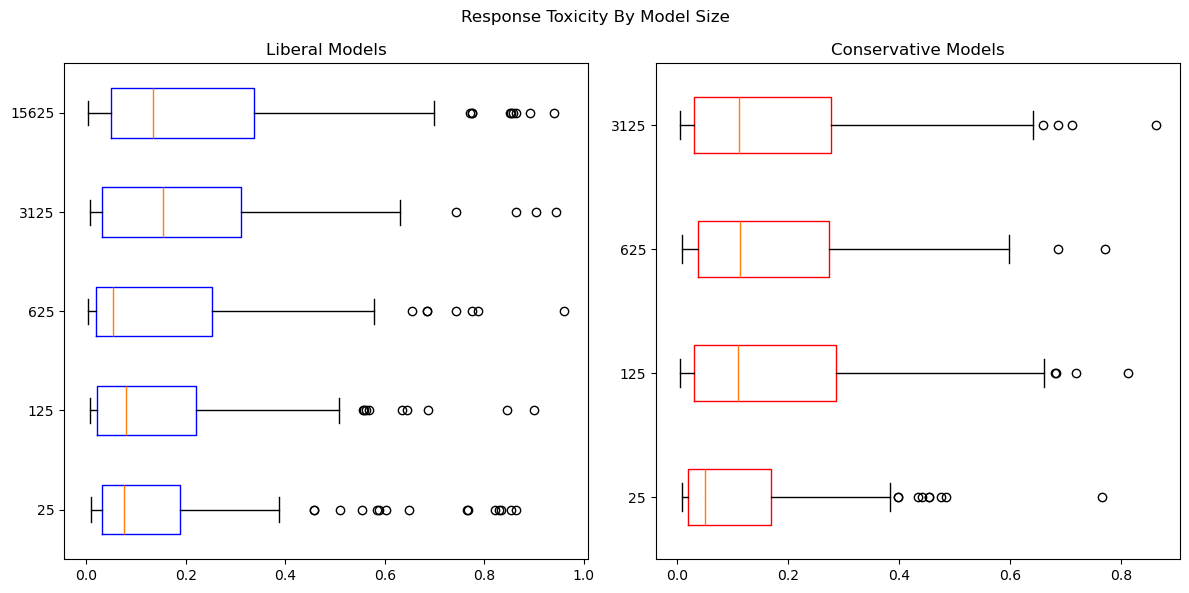

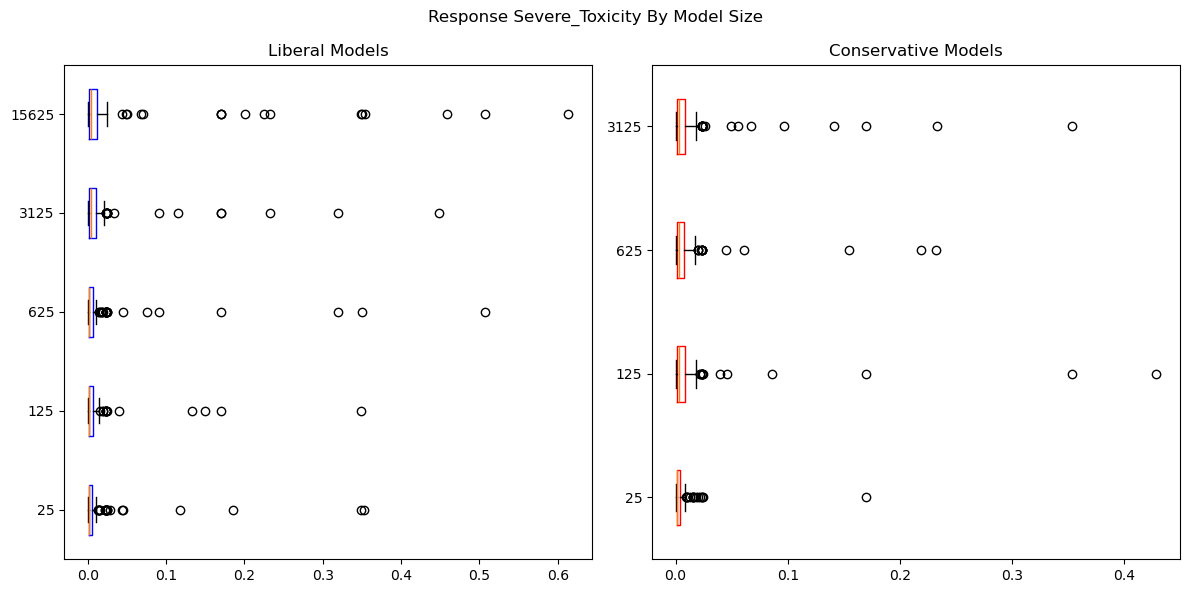

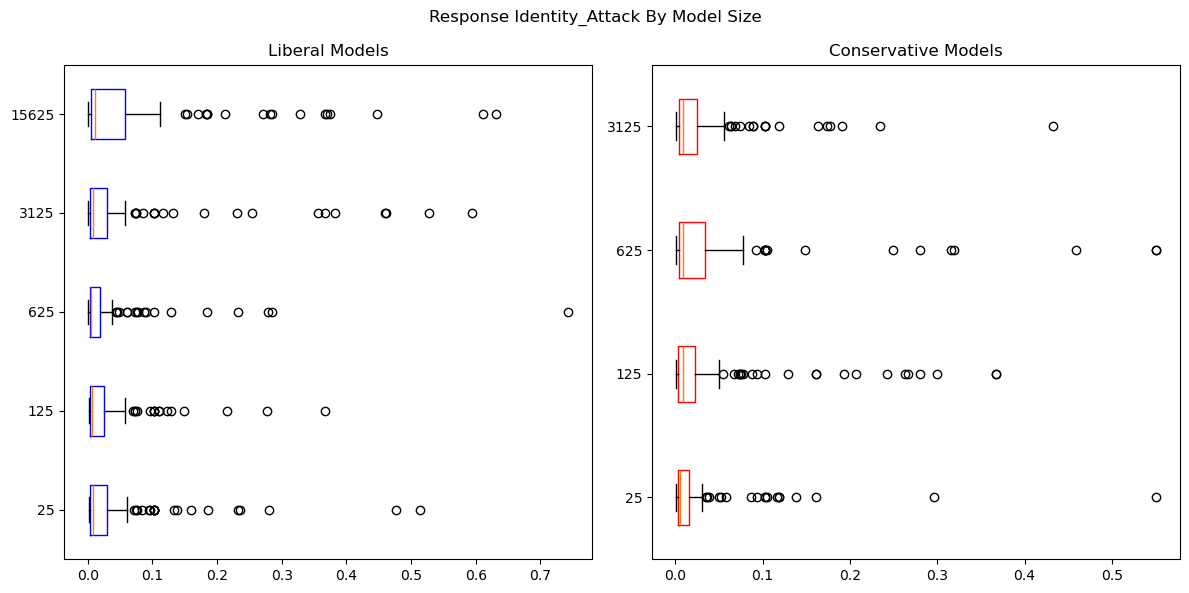

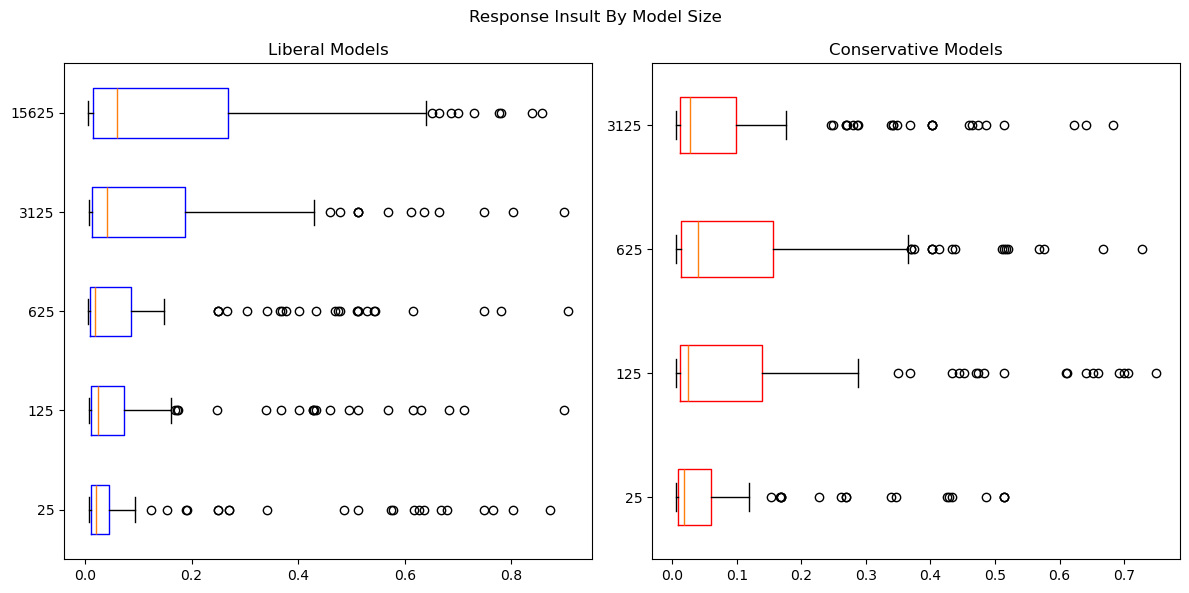

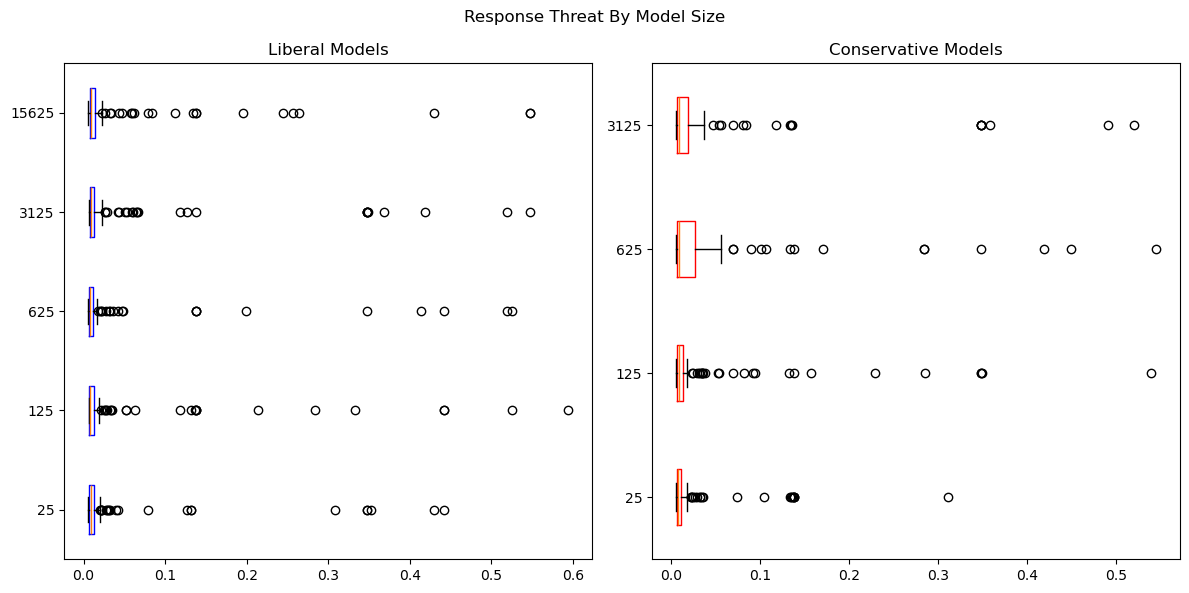

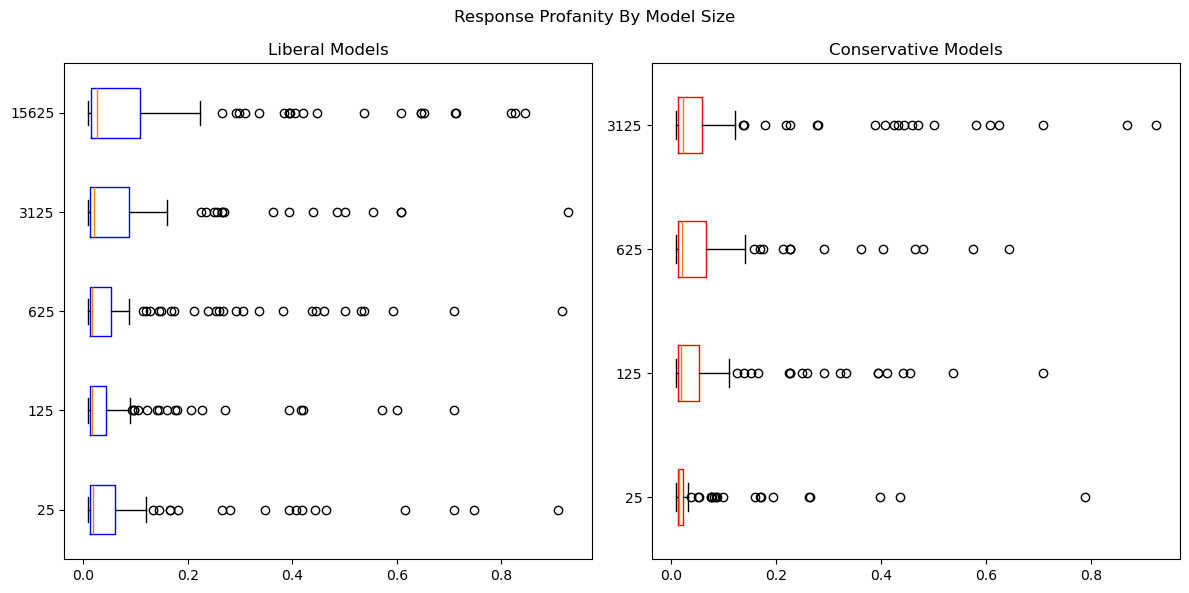

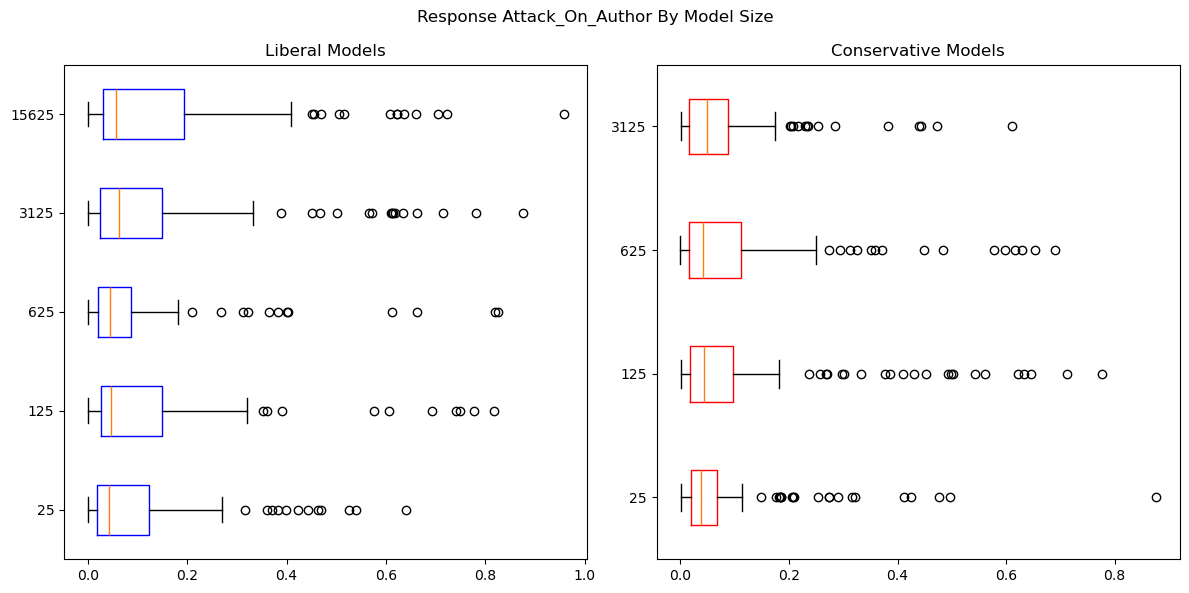

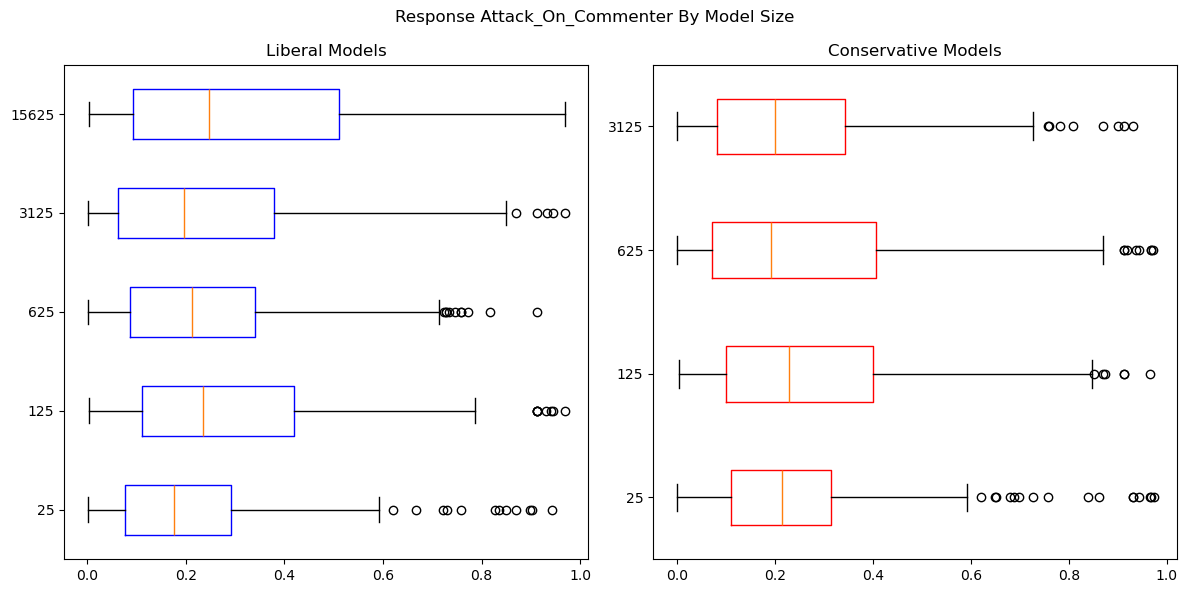

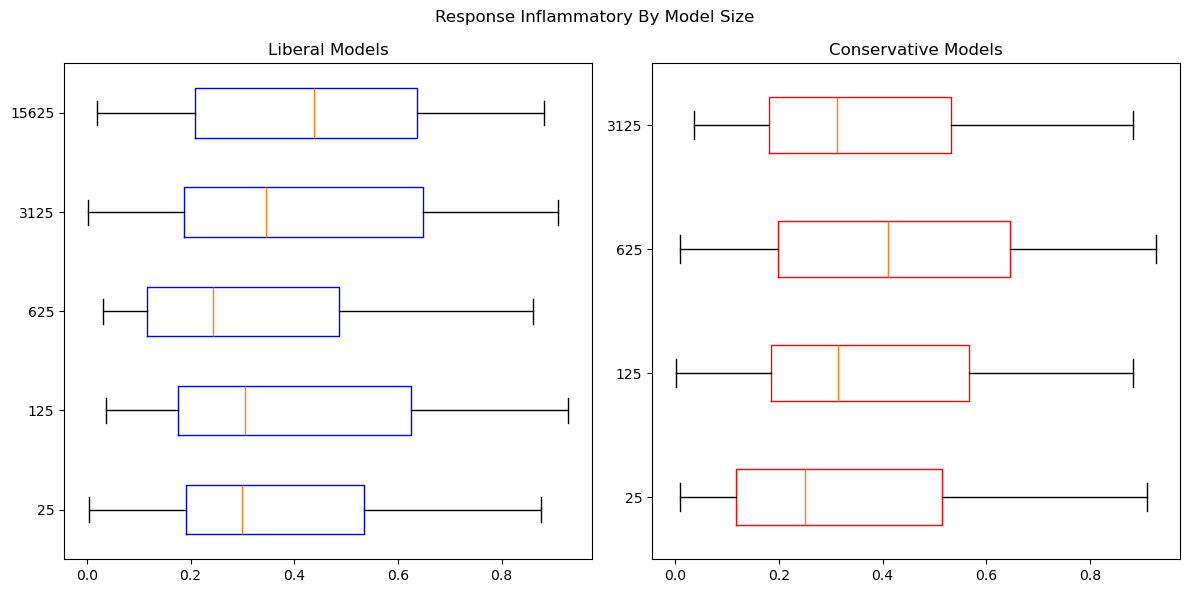

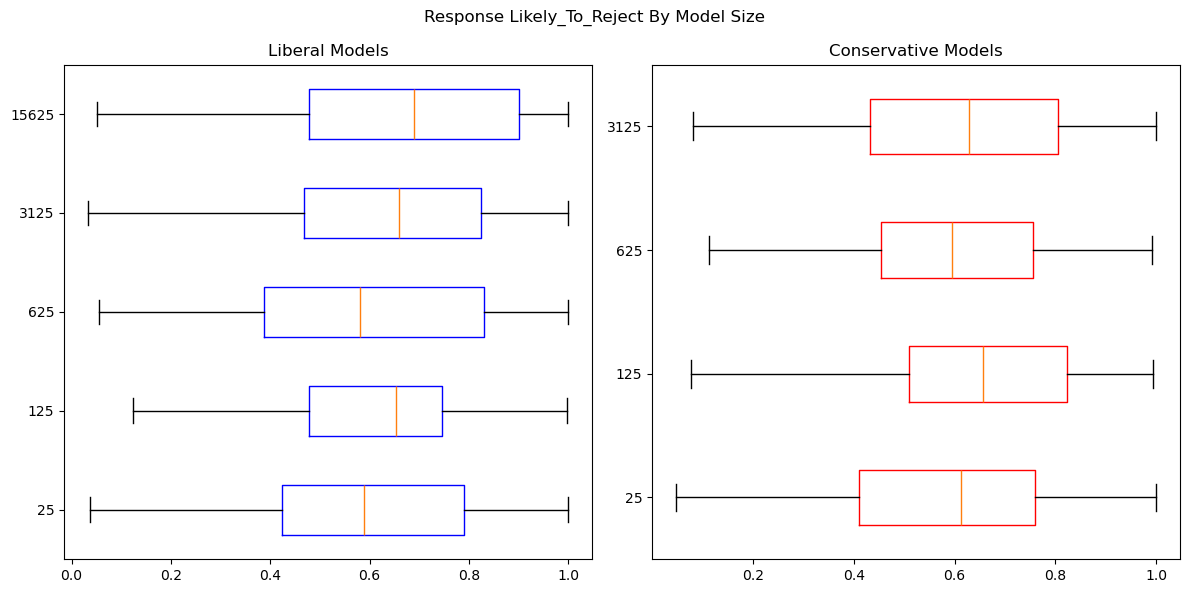

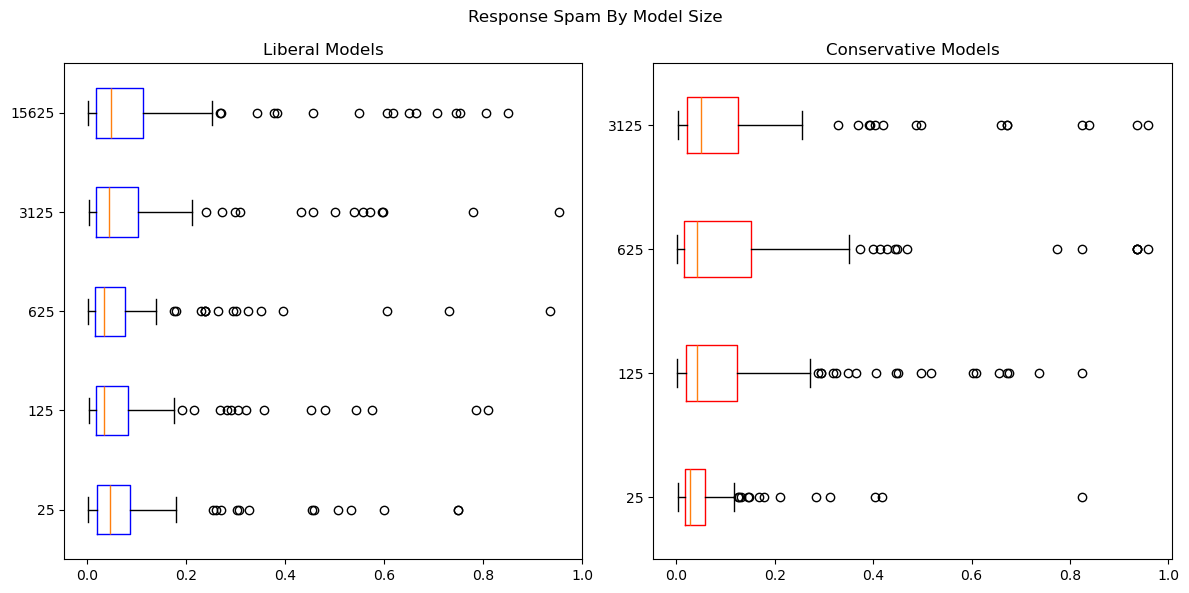

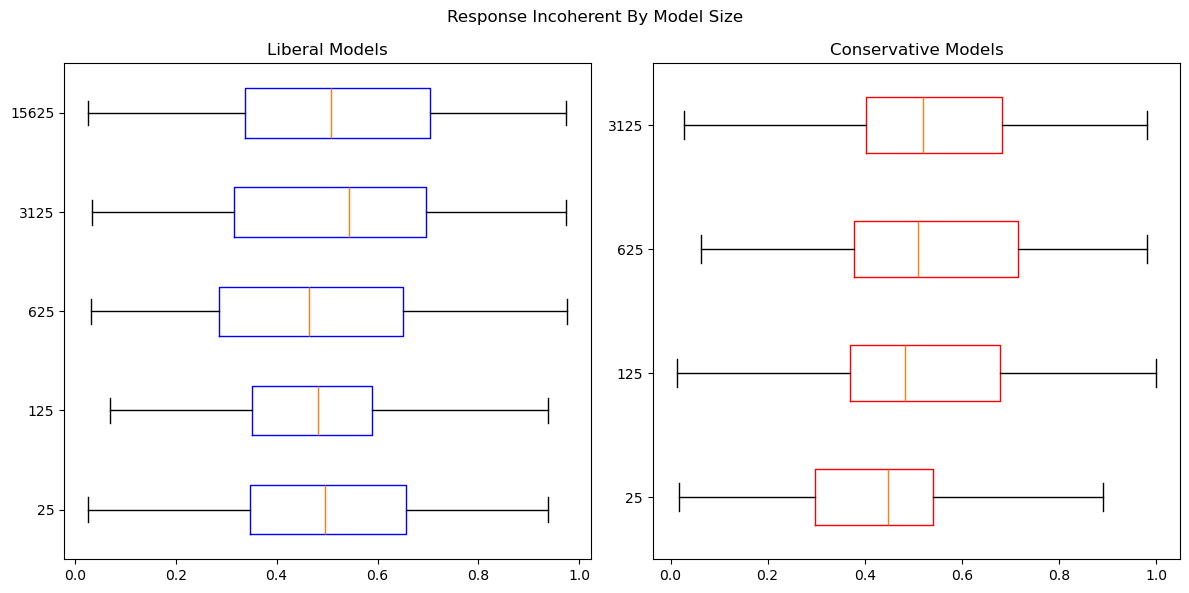

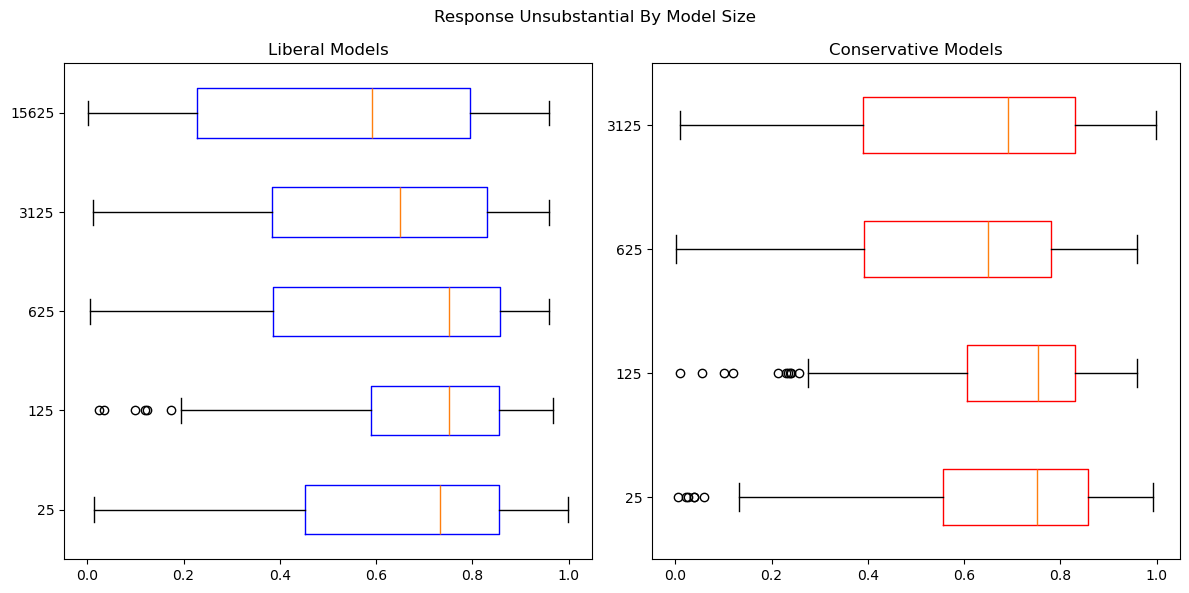

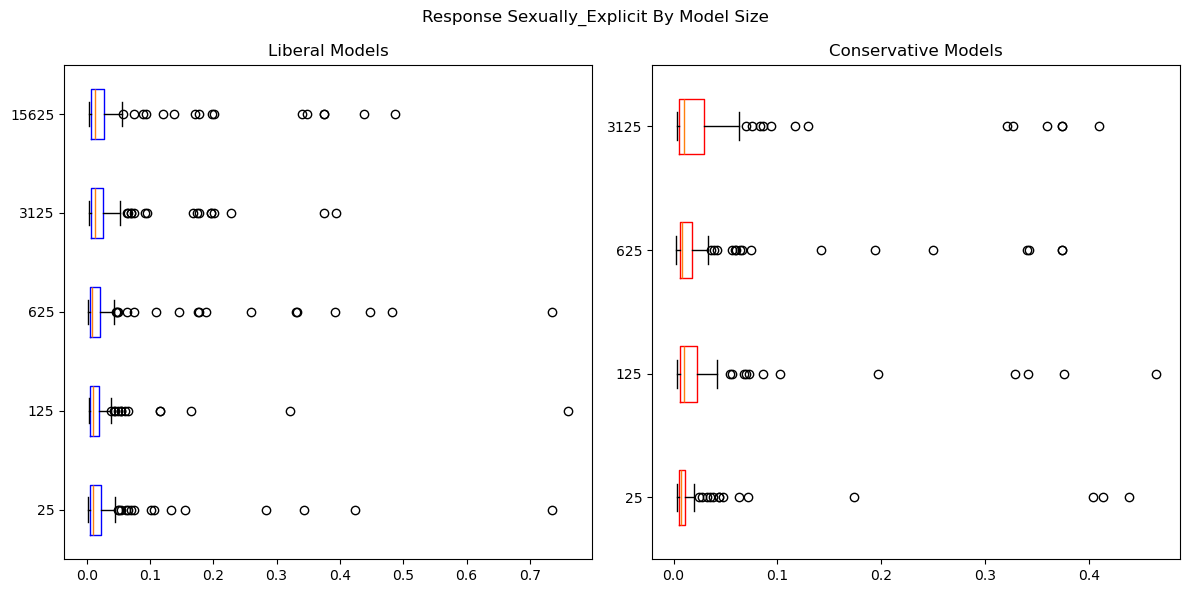

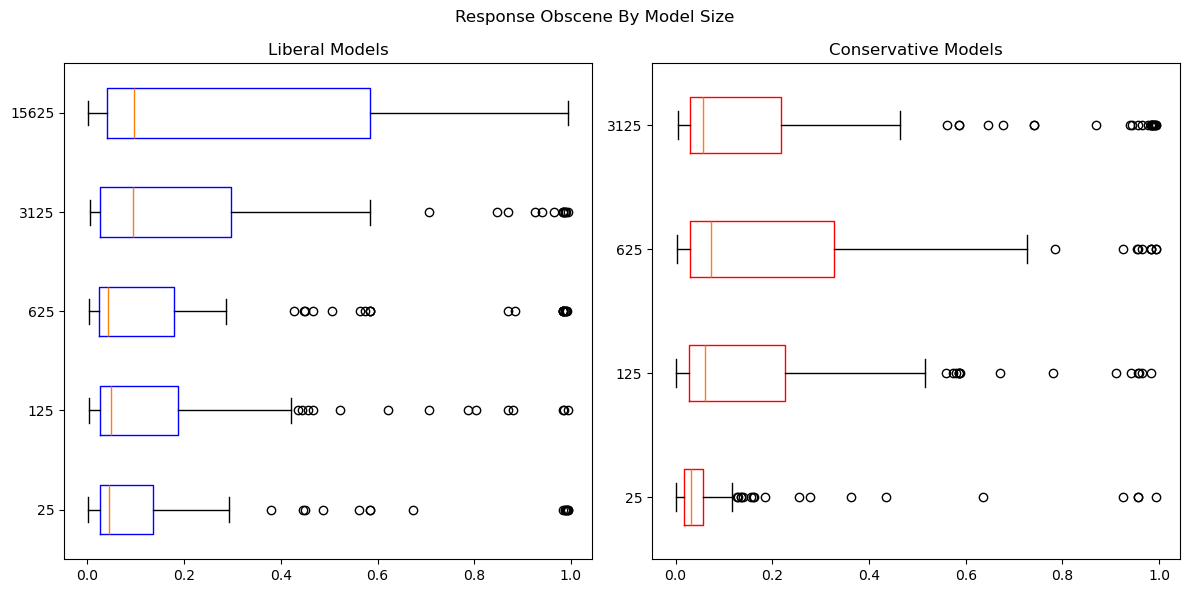

In [15]:
for m in METRICS:
    data = concatenate_response_scores(all_responses_df, 'score', metric=m)
    create_boxplot(data, m)

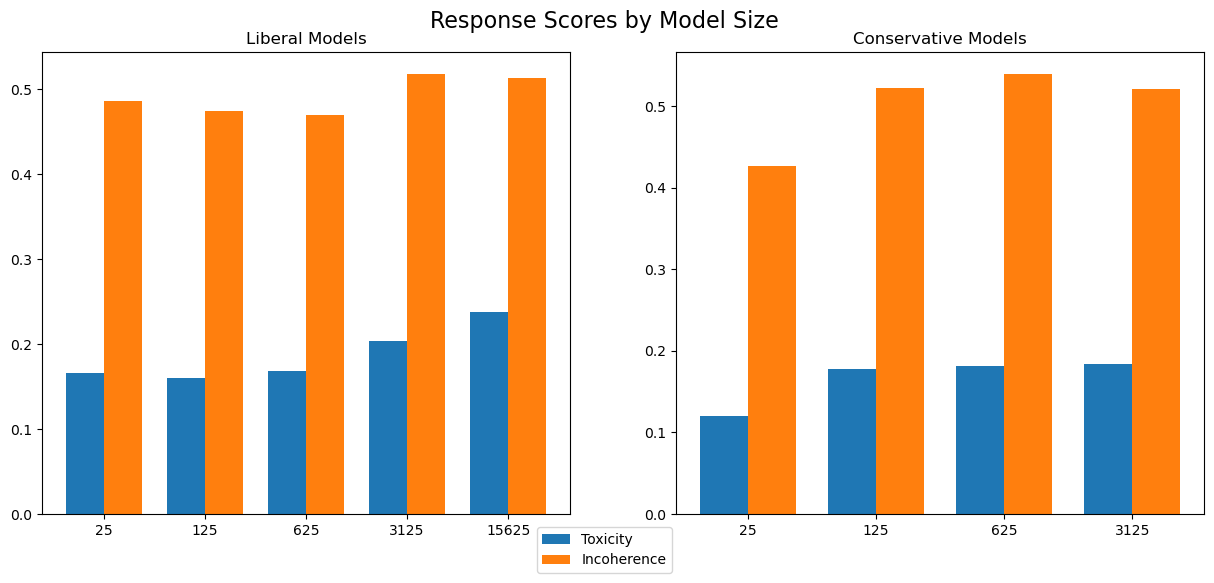

In [16]:
toxicity_scores = concatenate_response_scores(all_responses_df, 'score', metric='TOXICITY')
incoherence_scores = concatenate_response_scores(all_responses_df, 'score', metric='INCOHERENT')
create_bar_plots([toxicity_scores, incoherence_scores], ["Toxicity", 'Incoherence'])

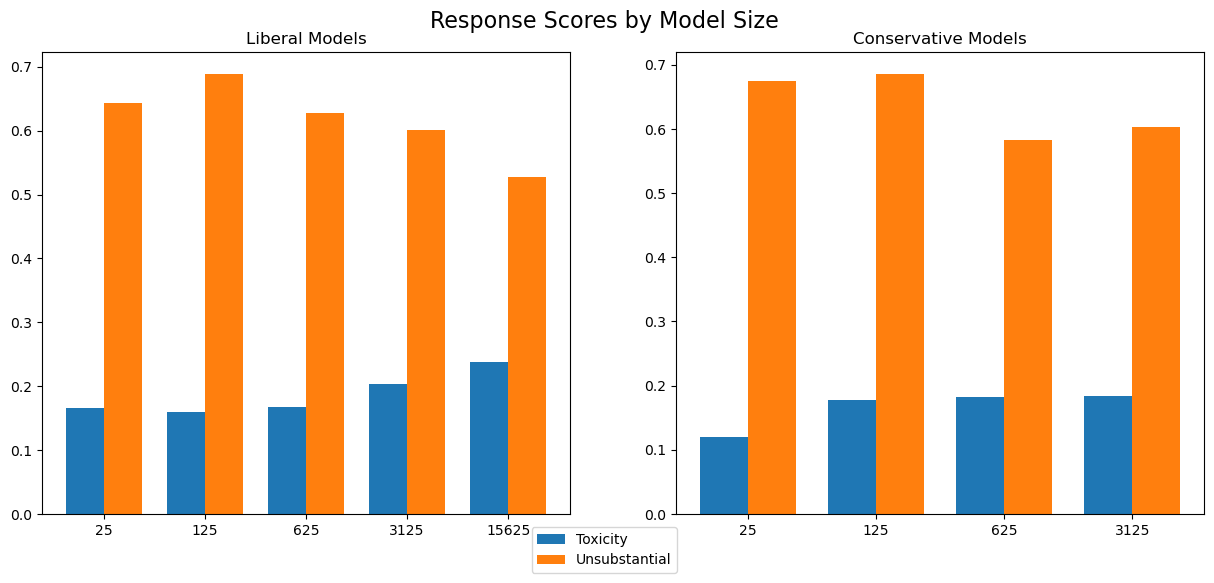

In [17]:
toxicity_scores = concatenate_response_scores(all_responses_df, 'score', metric='TOXICITY')
unsubstantial_scores = concatenate_response_scores(all_responses_df, 'score', metric='UNSUBSTANTIAL')
create_bar_plots([toxicity_scores, unsubstantial_scores], ["Toxicity", 'Unsubstantial'])

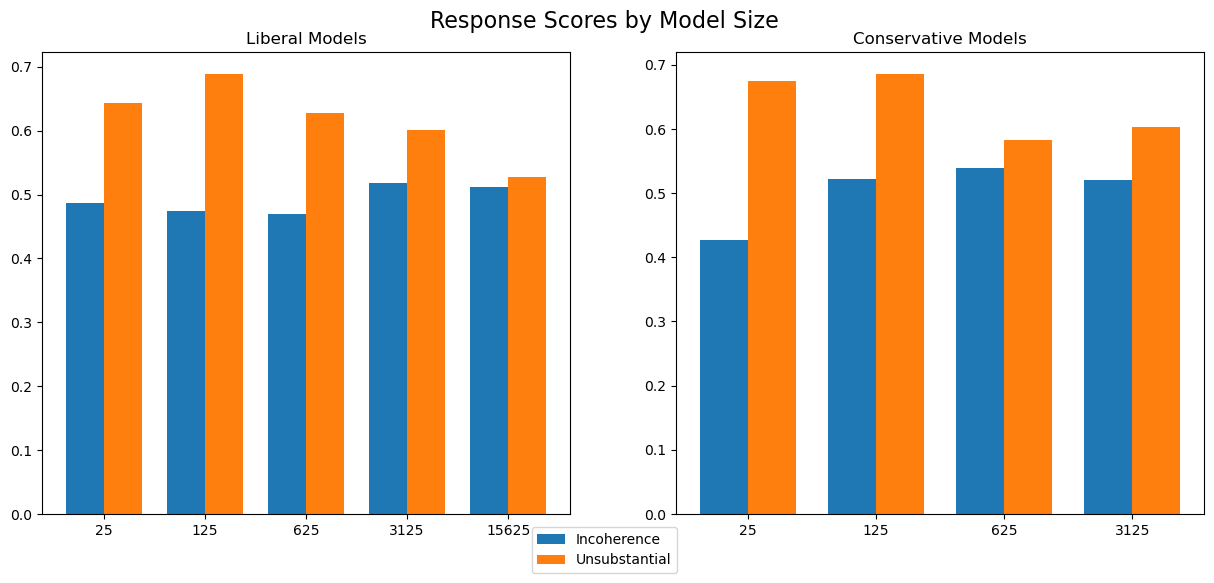

In [18]:
create_bar_plots([incoherence_scores, unsubstantial_scores], ["Incoherence", 'Unsubstantial'])

### As we can see there are tons of incoherent and unsubstantial responses. Let's create some functionality to remove responses based on a threshold and see how the interpretations change. An idea I am having is to do this and then find the most coherent responses (along with potentially asking new questiosn and keep the best answers from those) and use these to then fine tune new models such that their training is much more based off of question and answer as opposed to youtube comments.

Also I tested that gpt 4 does a good job determining the leaning of a response, so I think we can use that to filter training examples where our models did a bad job at aligning with a politcal ideology (i.e. a 'liberal' model answering with stereotypically conservative responses)

In [19]:
from copy import deepcopy
def threshold_incoherent_and_unsubstantial_reponses(df, incoherence_threshold = 1, unsubstantial_threshold = 1):   

    def remove_thresholded_values(cell):
        cell_copy = deepcopy(cell)
        below_incoherent_threshold = np.where(np.array(cell_copy[1]['INCOHERENT']) <= incoherence_threshold, 1, 0)
        below_unsubstantial_threshold = np.where(np.array(cell_copy[1]['UNSUBSTANTIAL']) <= unsubstantial_threshold, 1, 0)
        kept_indices = np.logical_and(below_incoherent_threshold, below_unsubstantial_threshold)
        cell_copy[0] = np.array(cell_copy[0])[kept_indices].tolist()
        for metric in cell_copy[1].keys():
            cell_copy[1][metric] = np.array(cell_copy[1][metric])[kept_indices].tolist()
        return cell_copy
    
    return df.map(remove_thresholded_values)

Threshold: 0.25
Threshold: 0.41666666666666663
Threshold: 0.5833333333333333
Threshold: 0.75


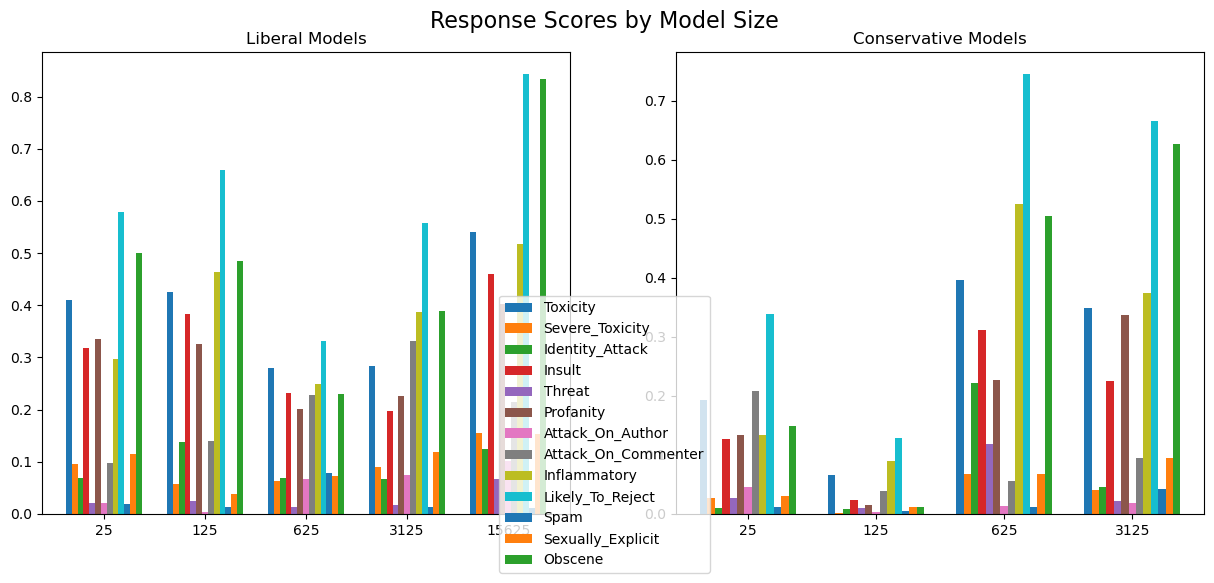

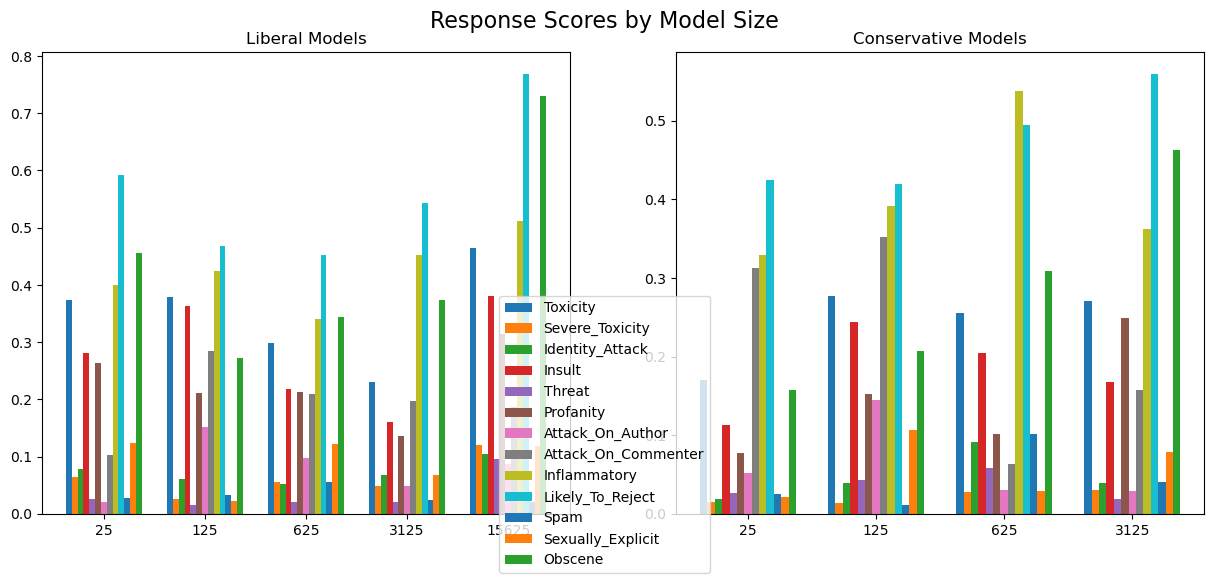

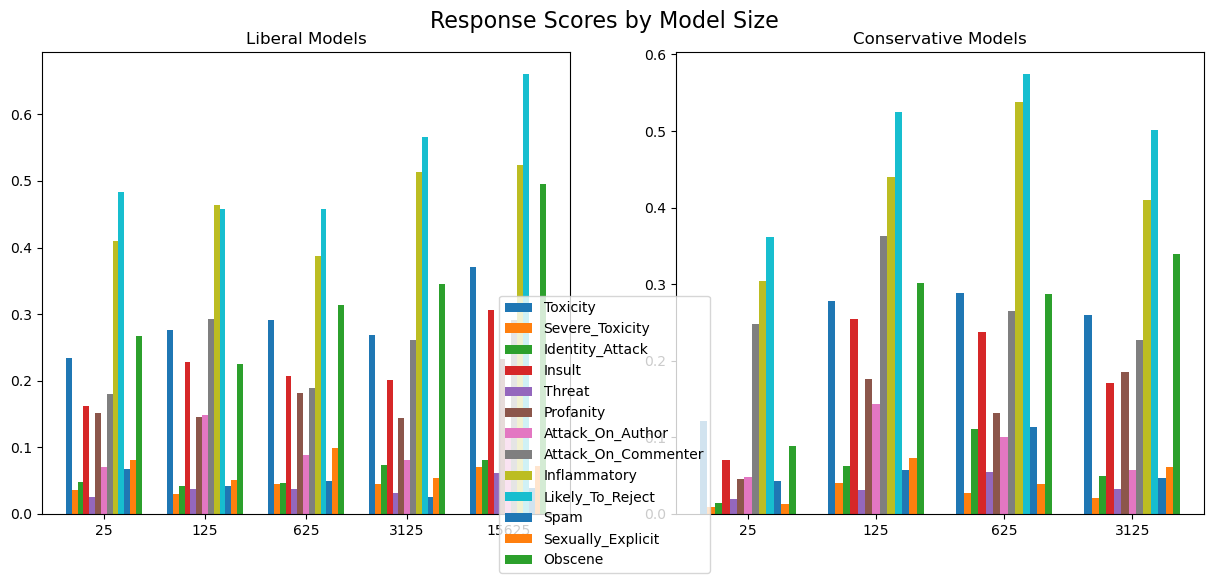

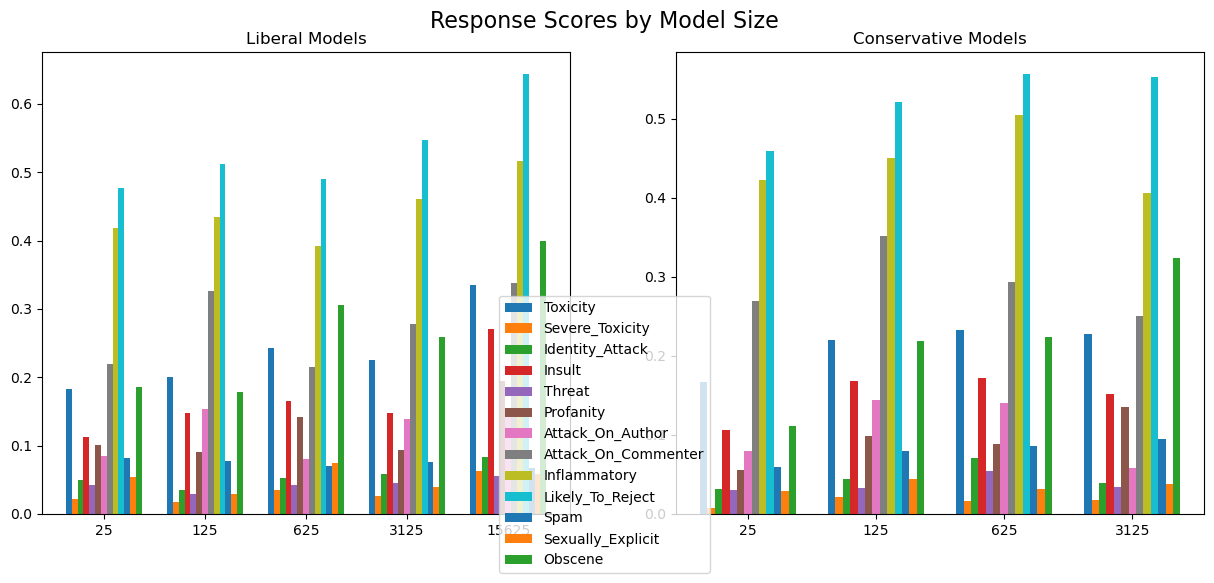

In [20]:
from copy import deepcopy
for threshold in np.linspace(.25, .75, 4):
    temp_df = all_responses_df.copy(deep=True)
    thresholded_df = threshold_incoherent_and_unsubstantial_reponses(temp_df, threshold, threshold)
    print("Threshold:", threshold)
    unincluded = ['INCOHERENT', 'UNSUBSTANTIAL']
    attribute_data = [concatenate_response_scores(thresholded_df, 'score', metric=met) for met in METRICS if met not in unincluded]
    names = [met.title() for met in METRICS if met not in unincluded]
    create_bar_plots(attribute_data, names)

Threshold: 0.25


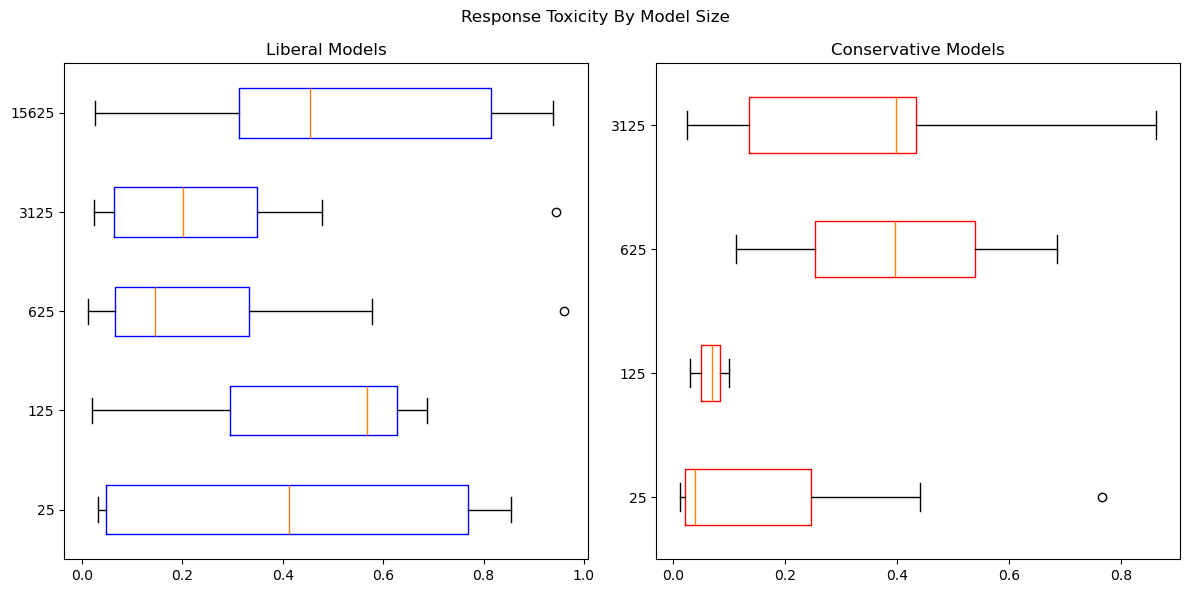

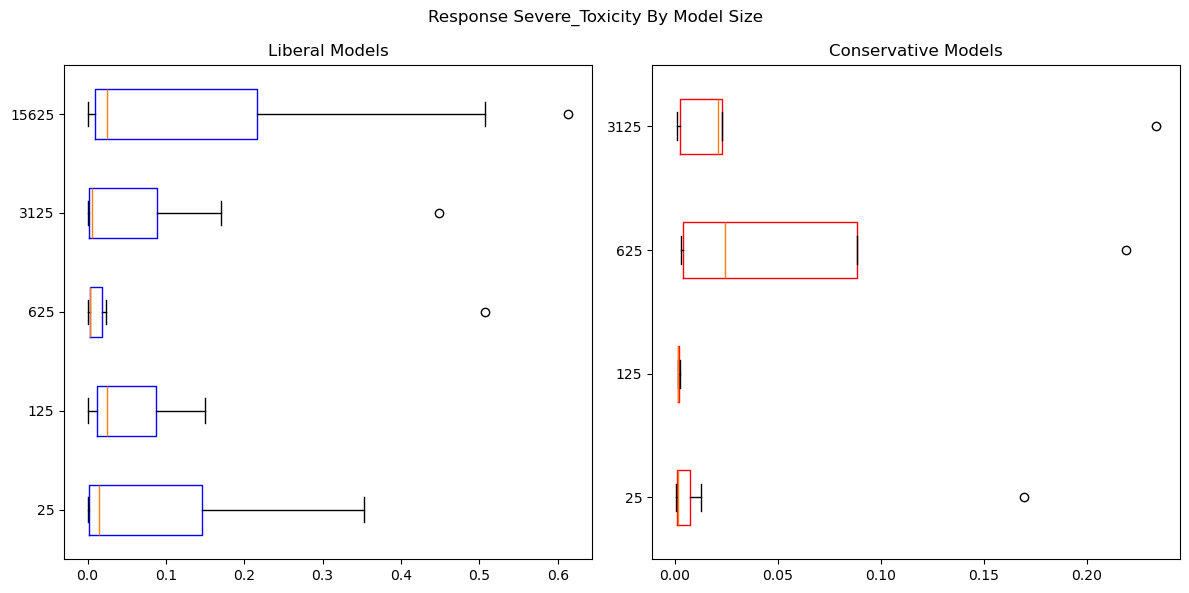

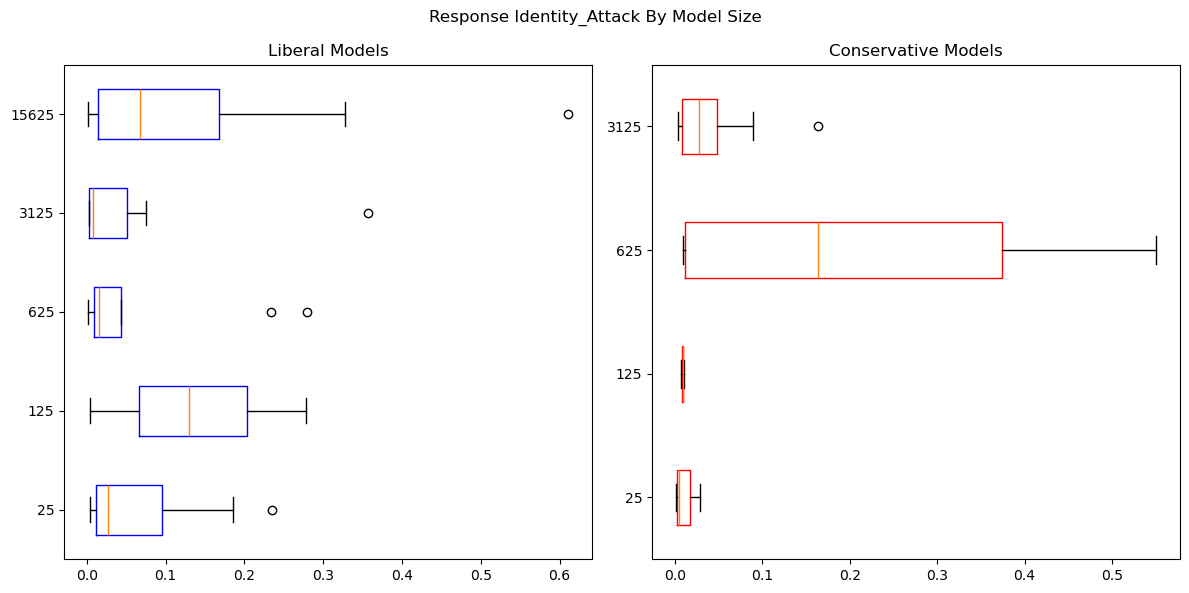

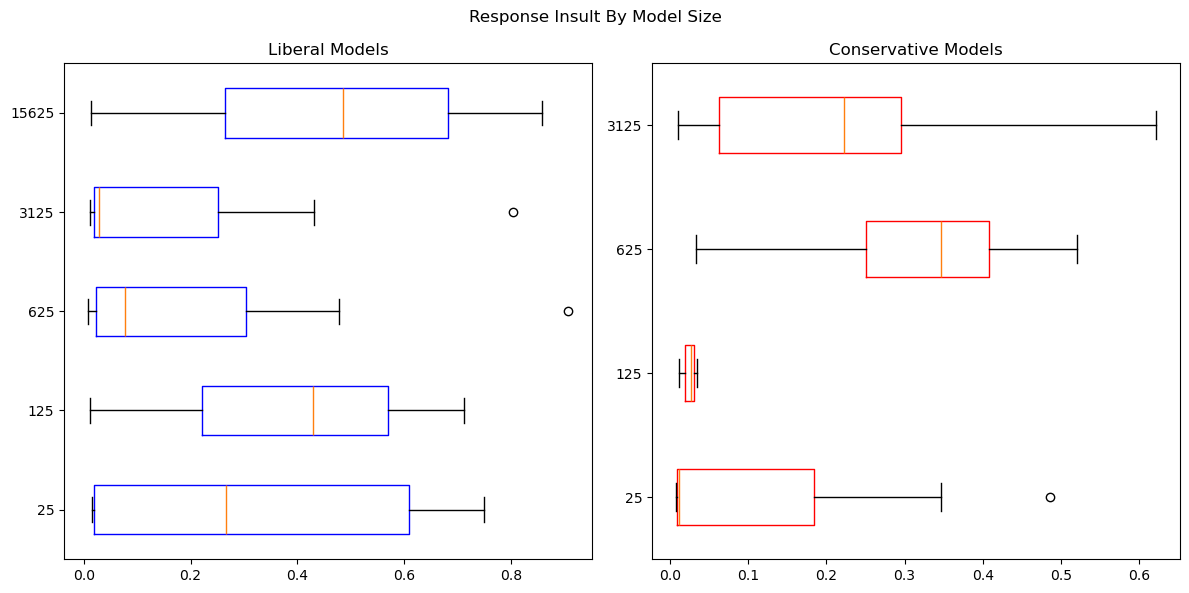

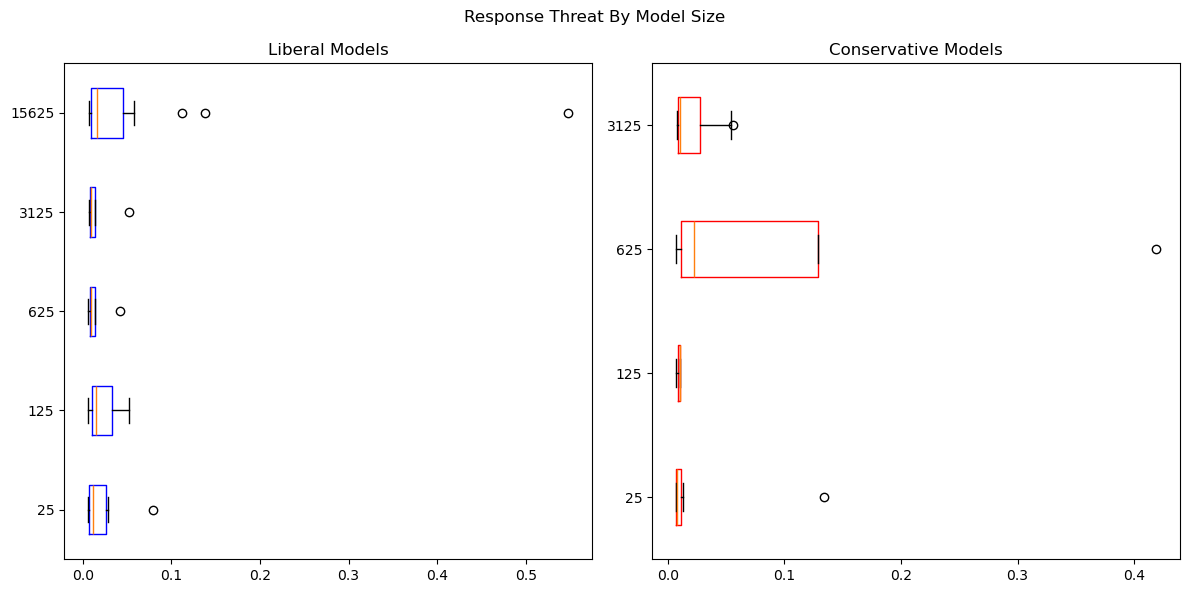

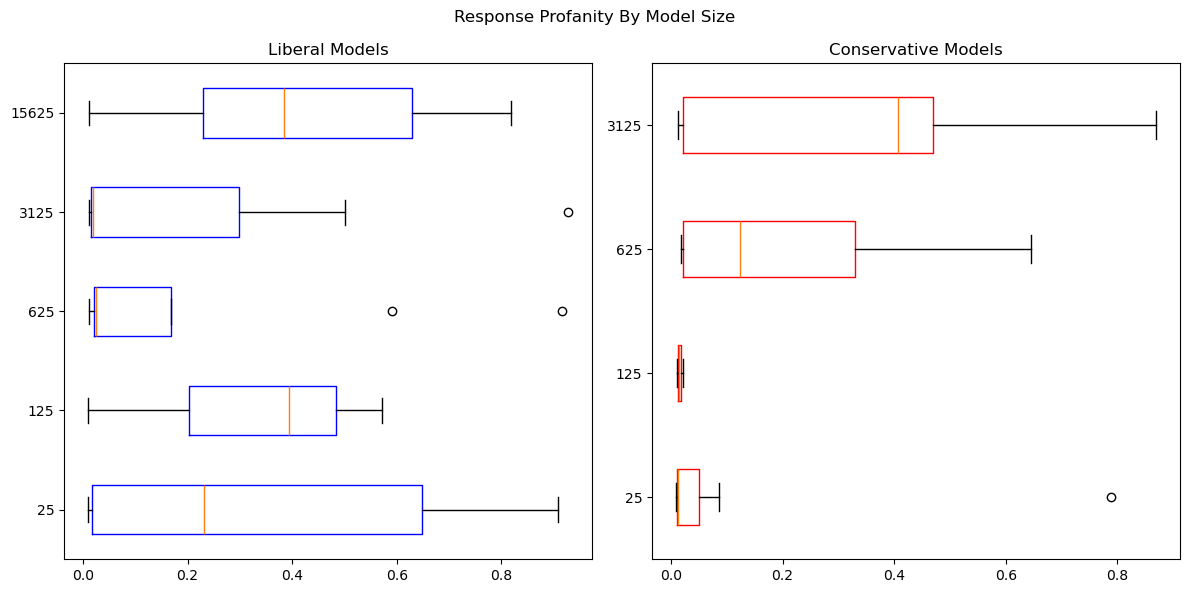

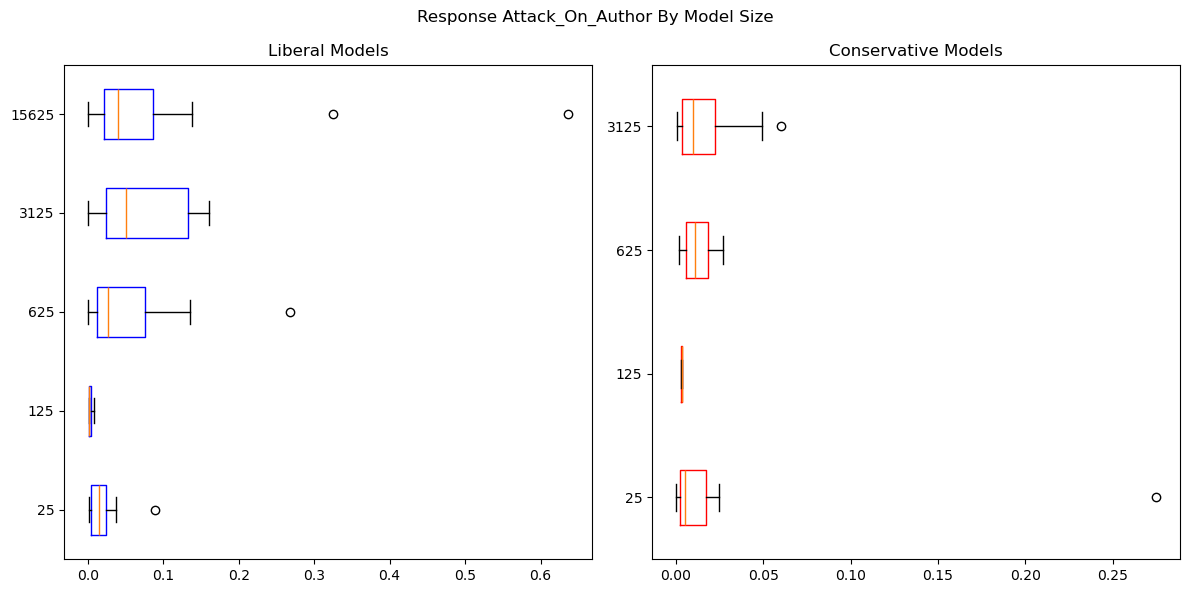

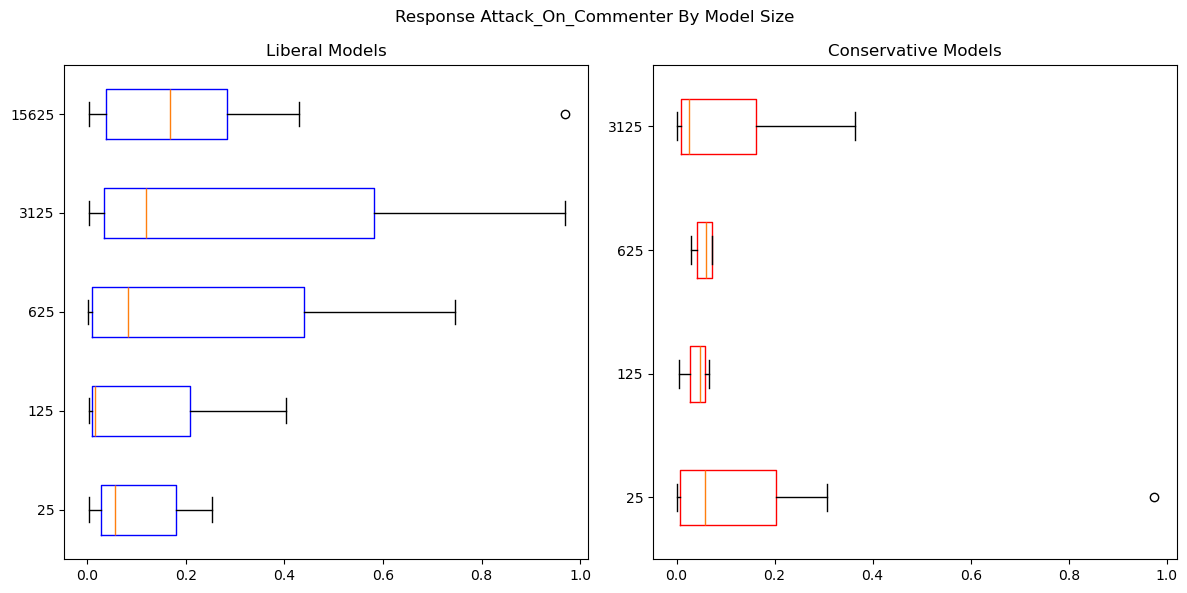

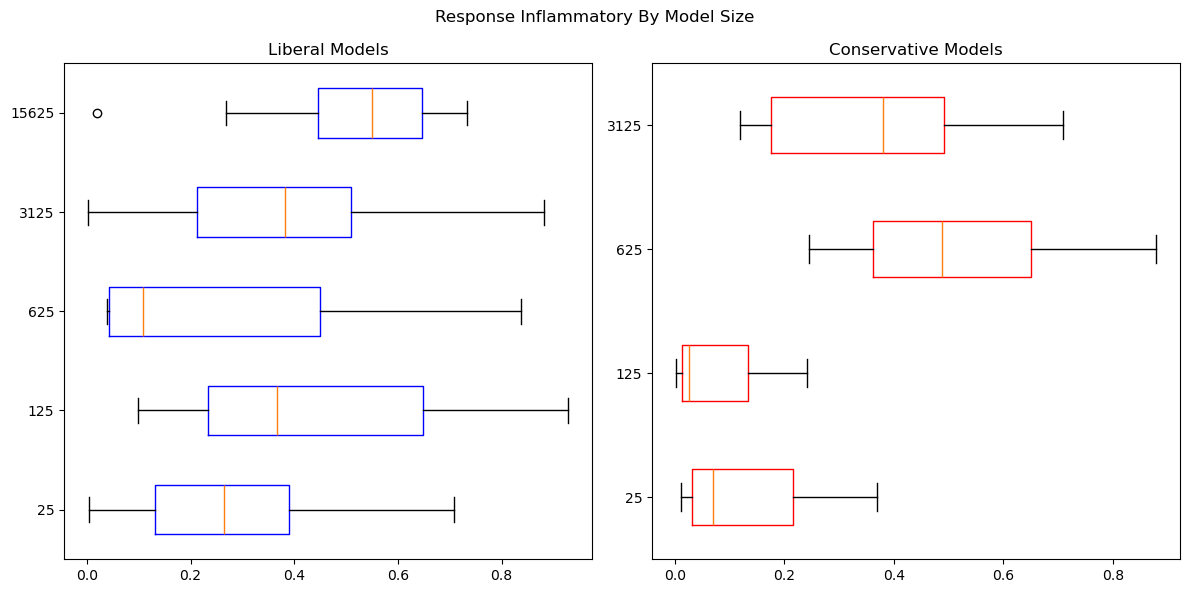

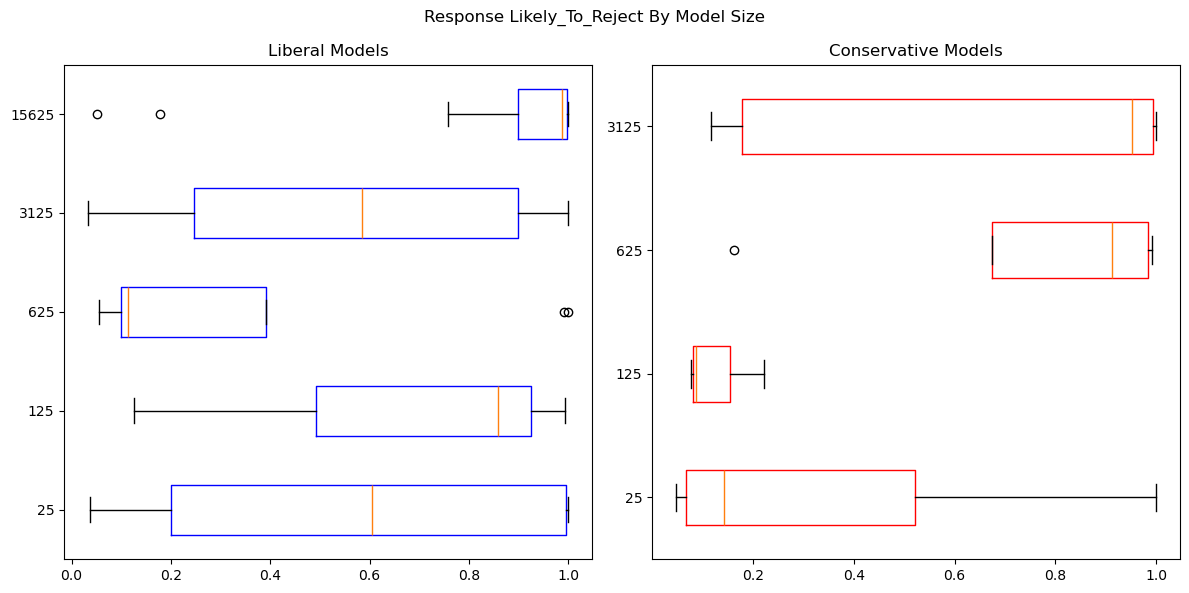

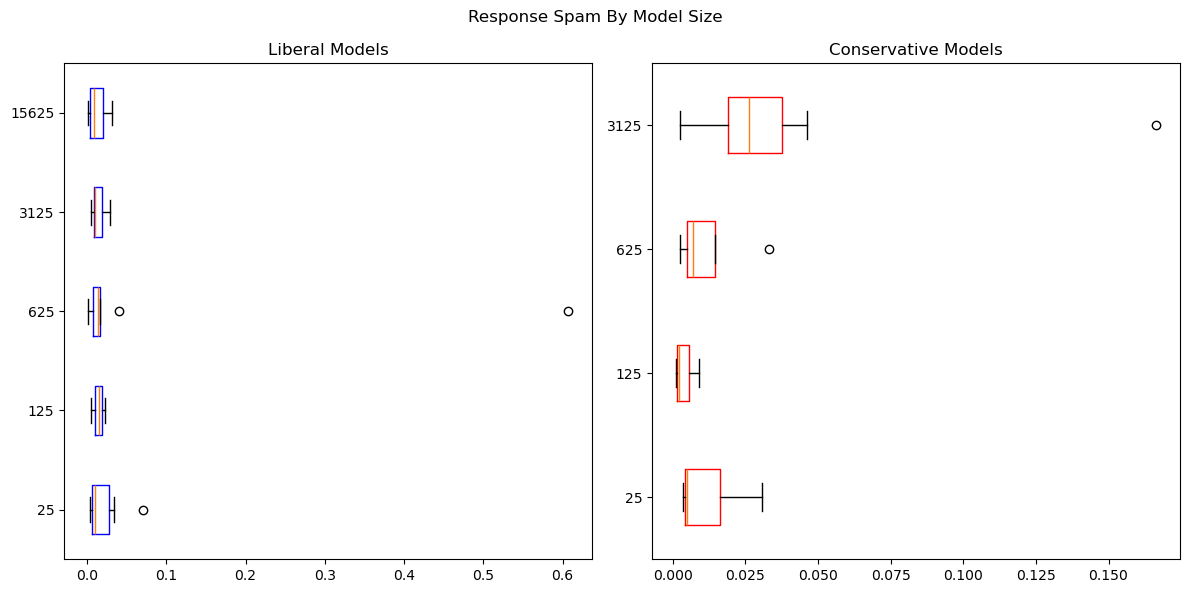

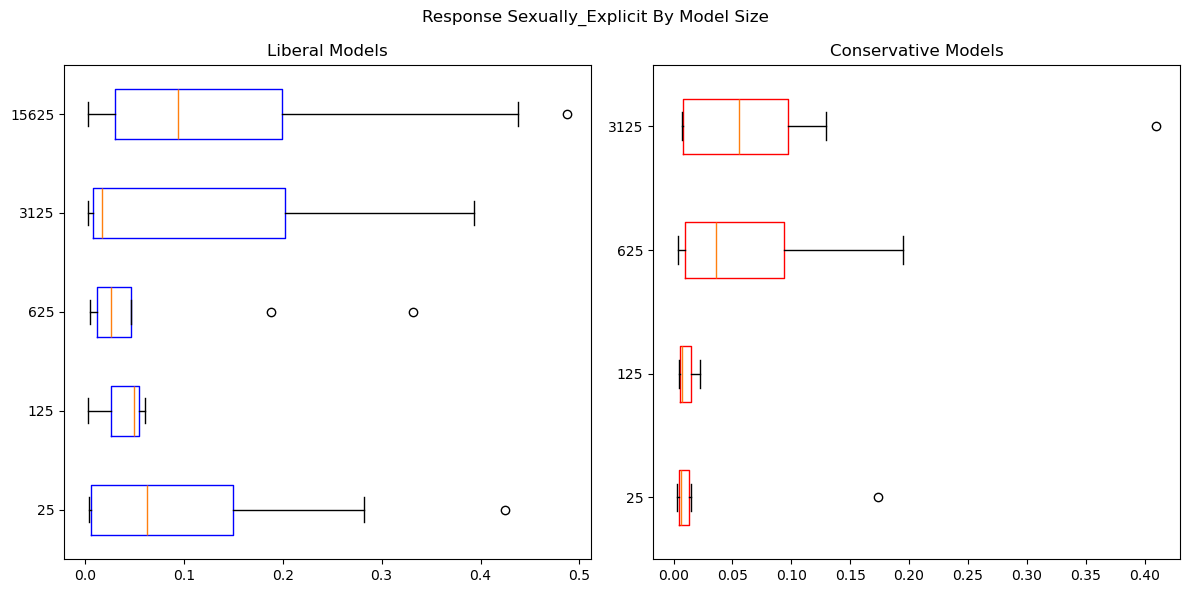

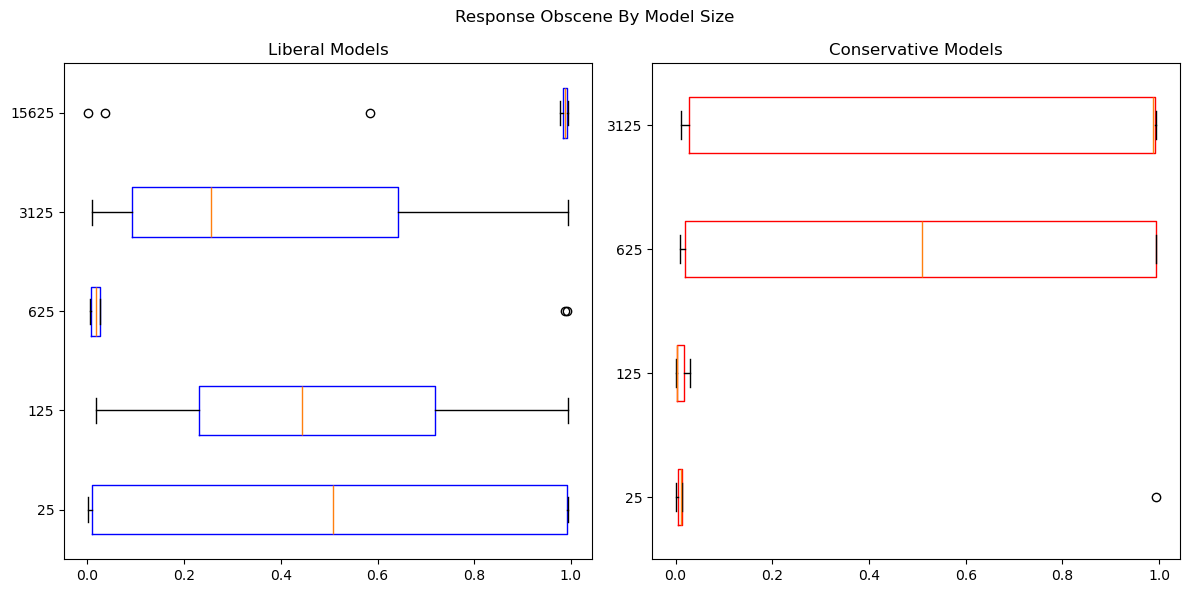

Threshold: 0.41666666666666663


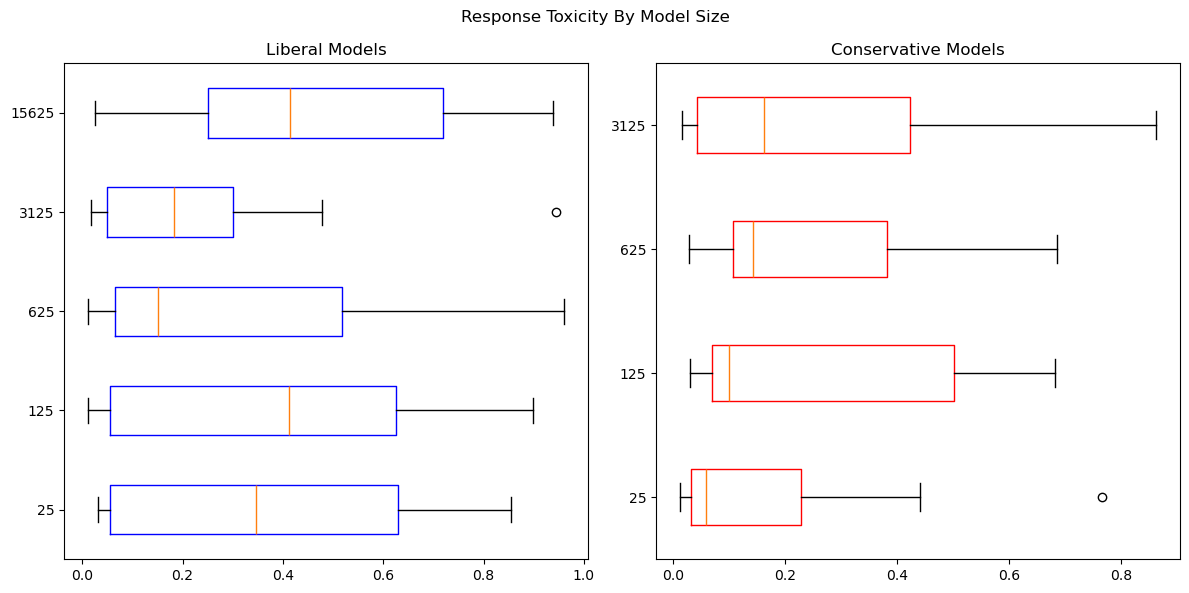

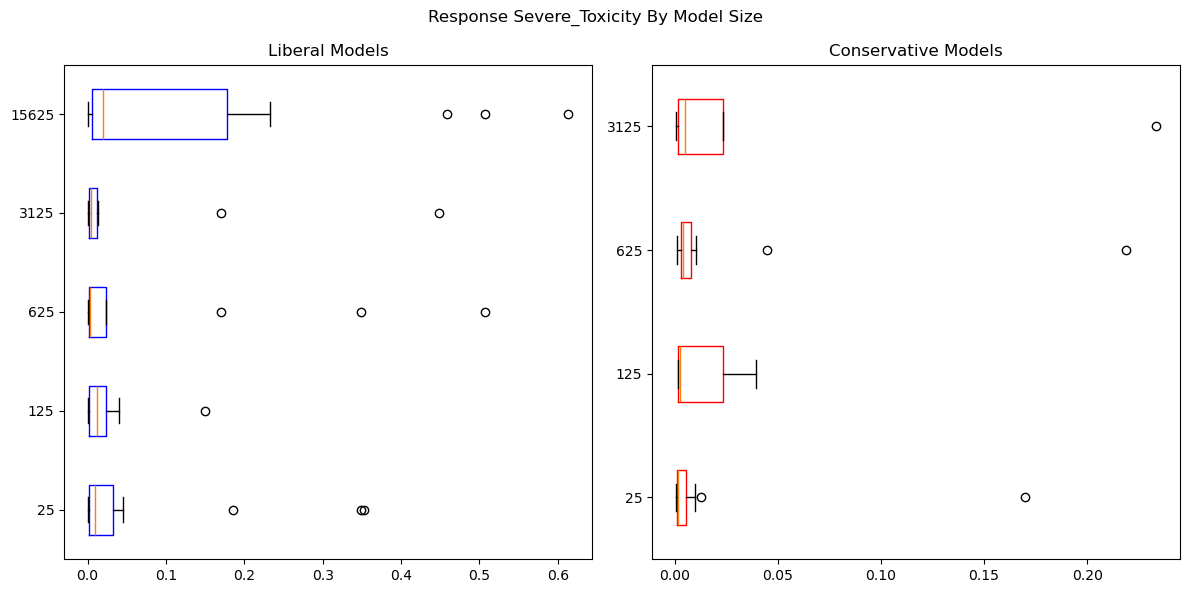

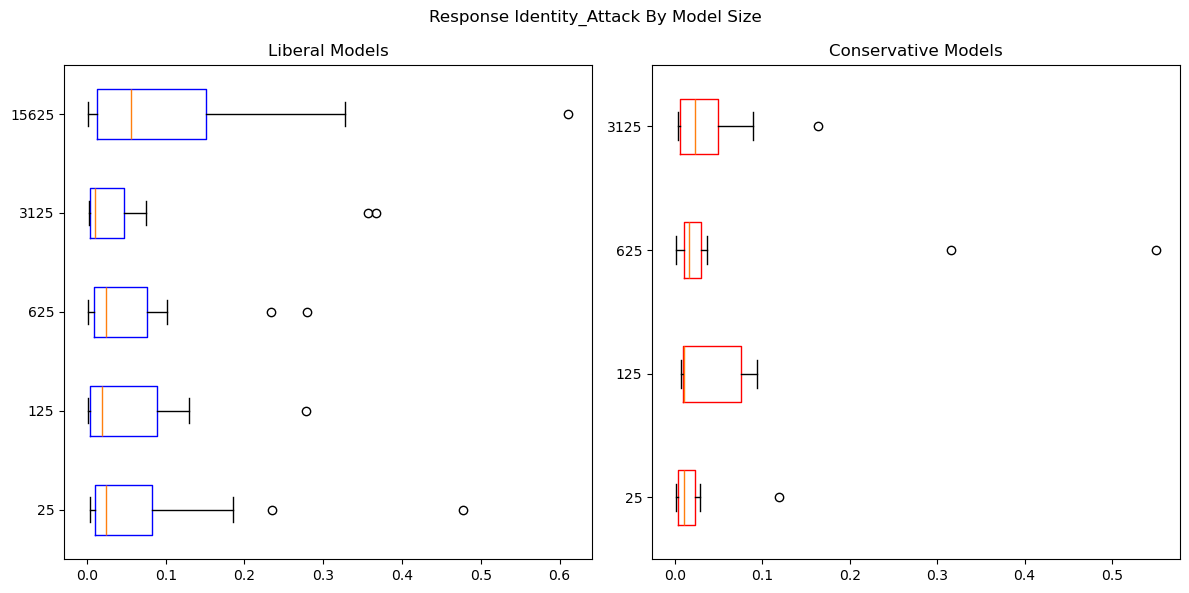

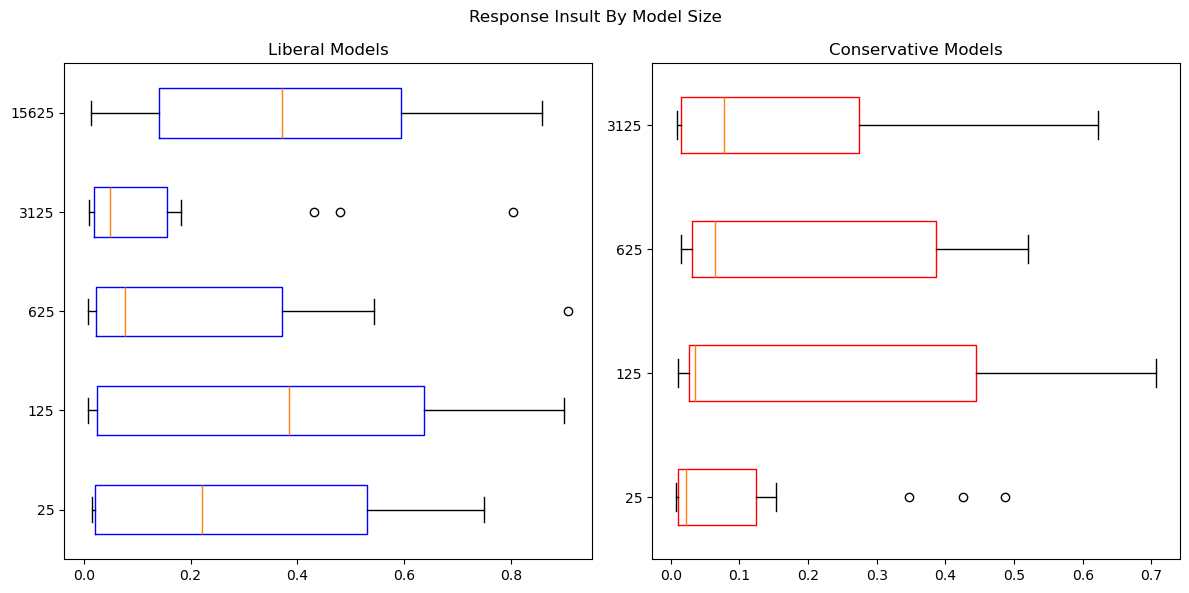

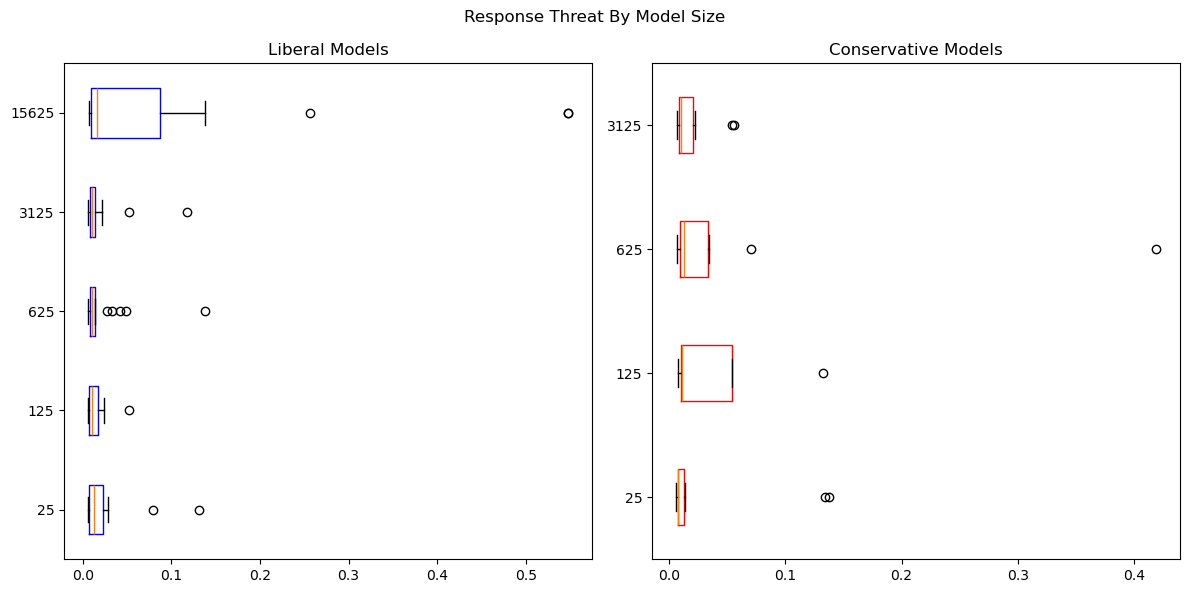

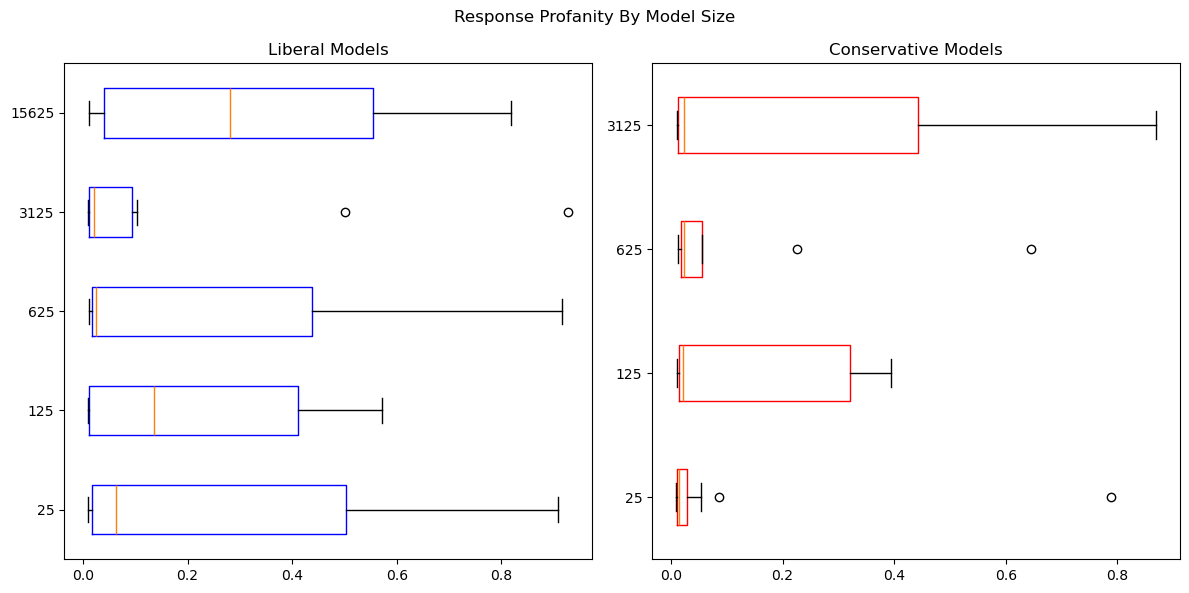

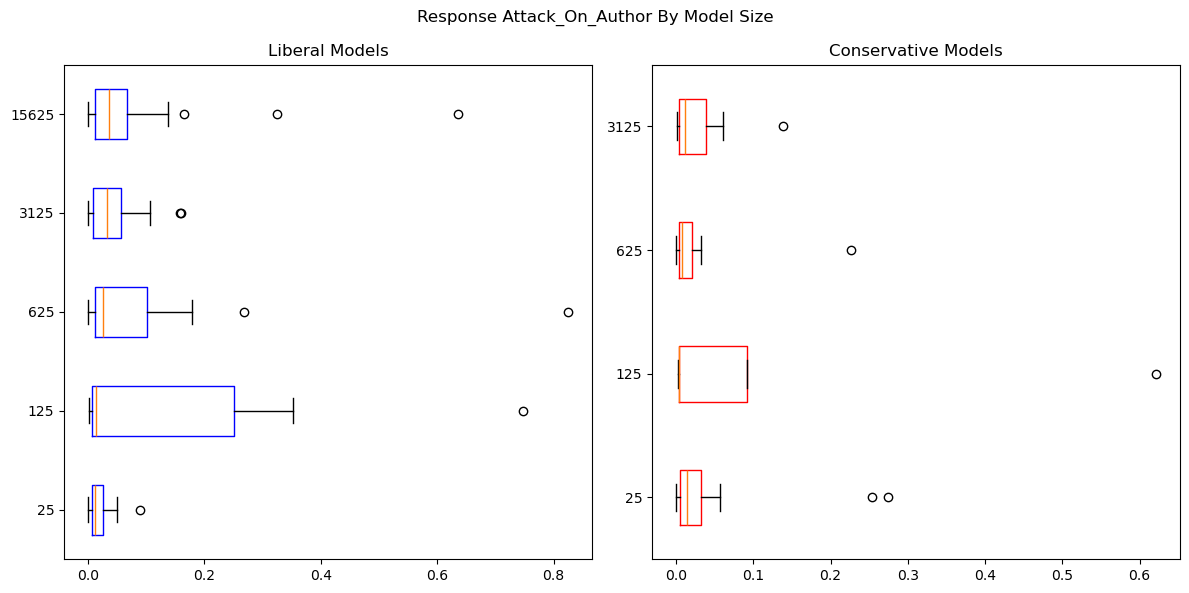

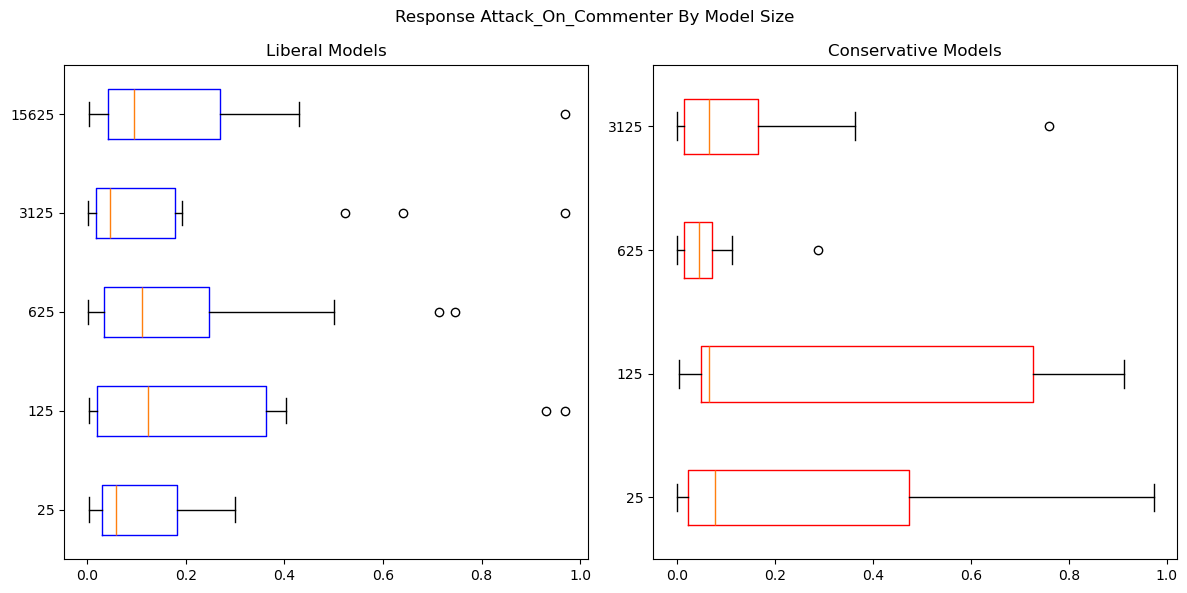

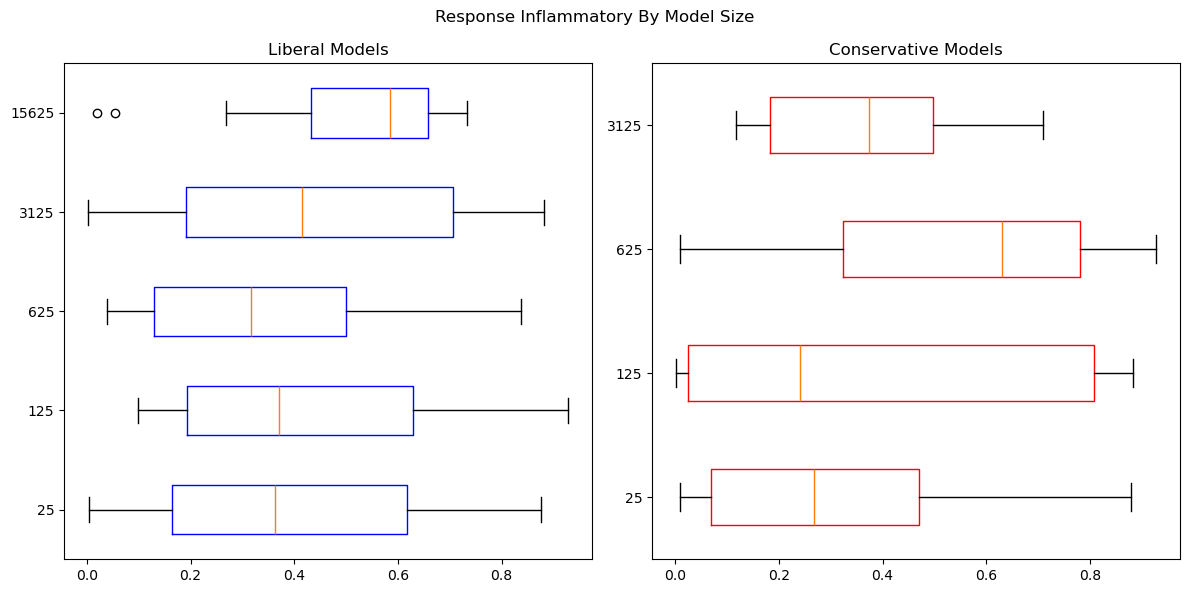

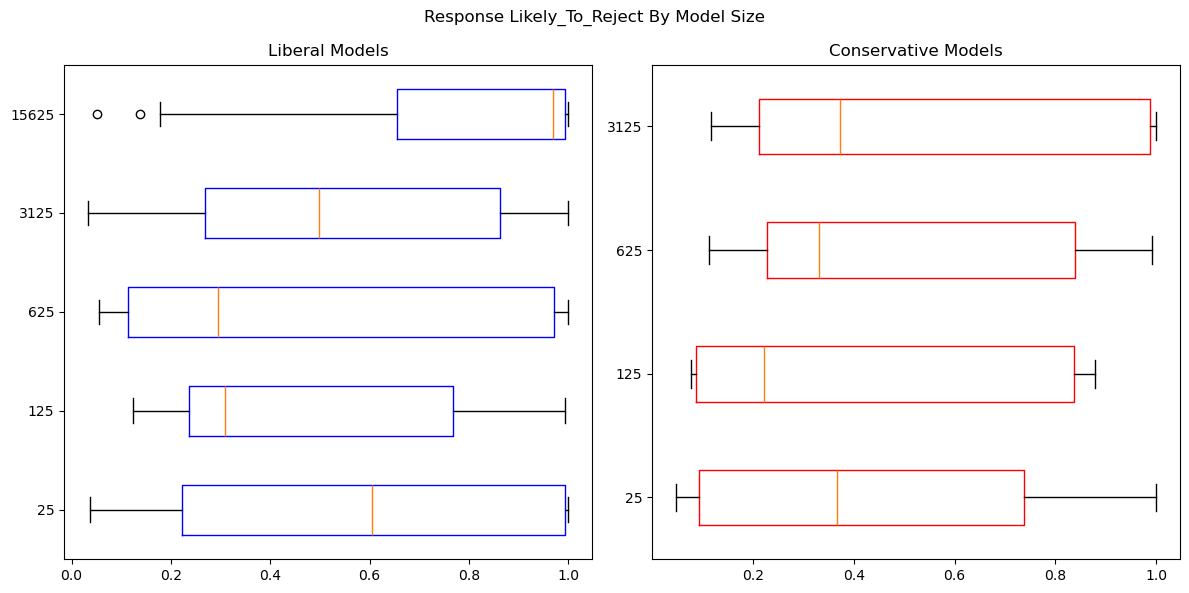

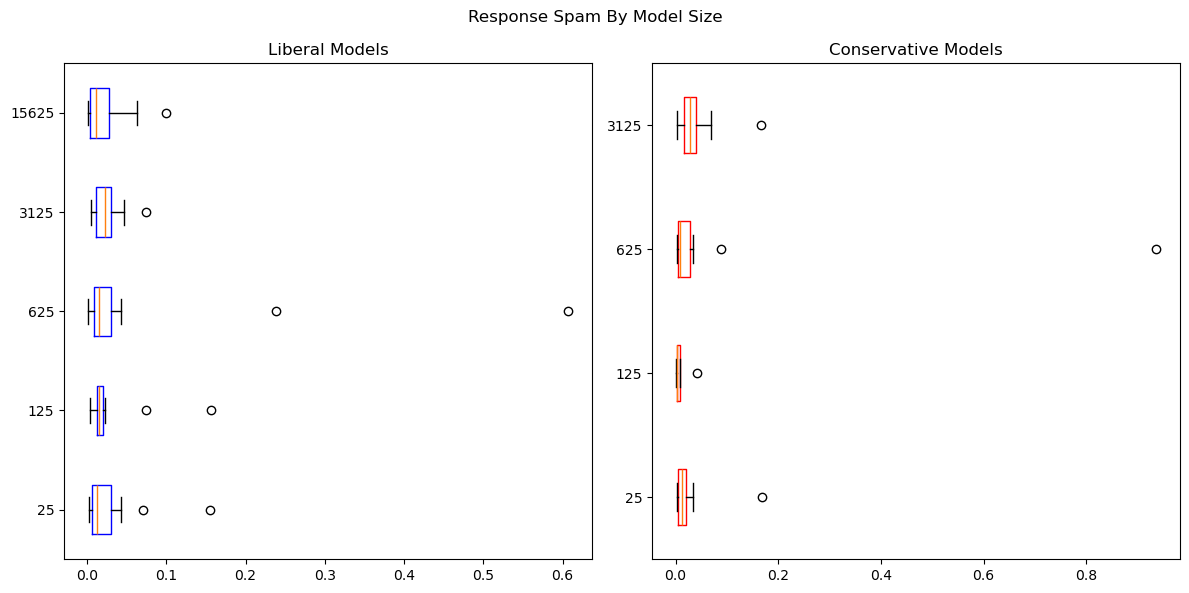

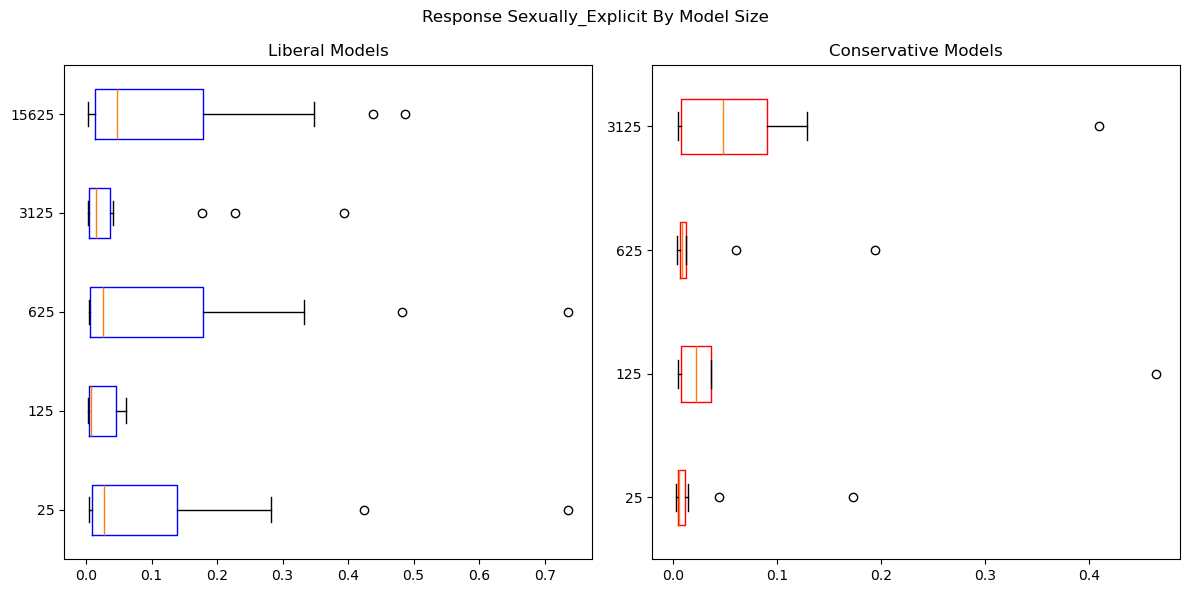

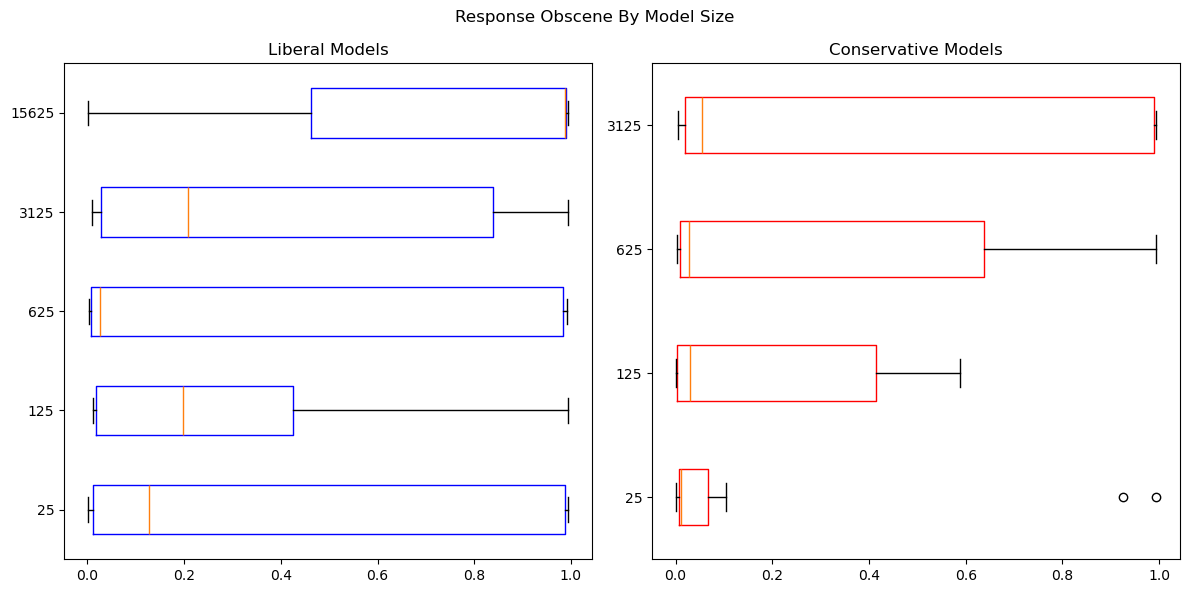

Threshold: 0.5833333333333333


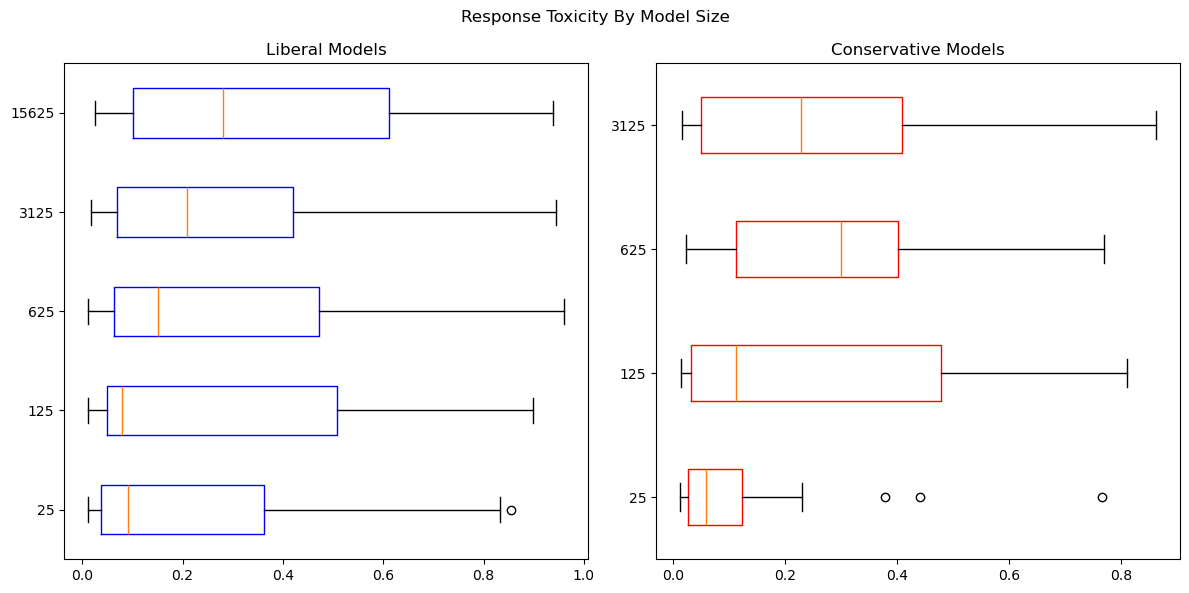

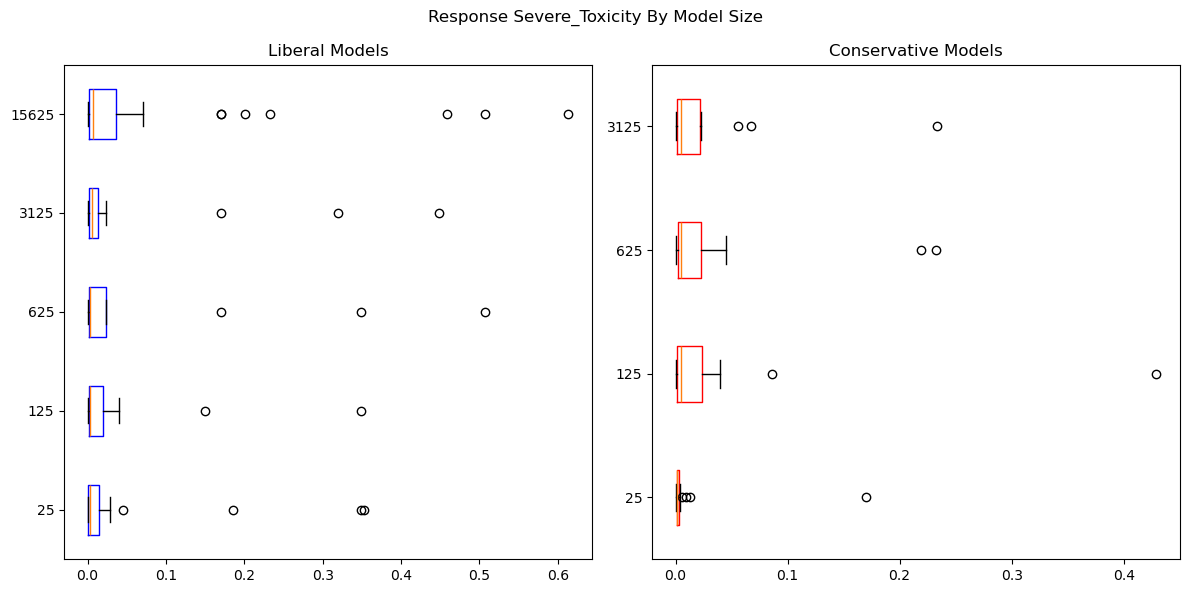

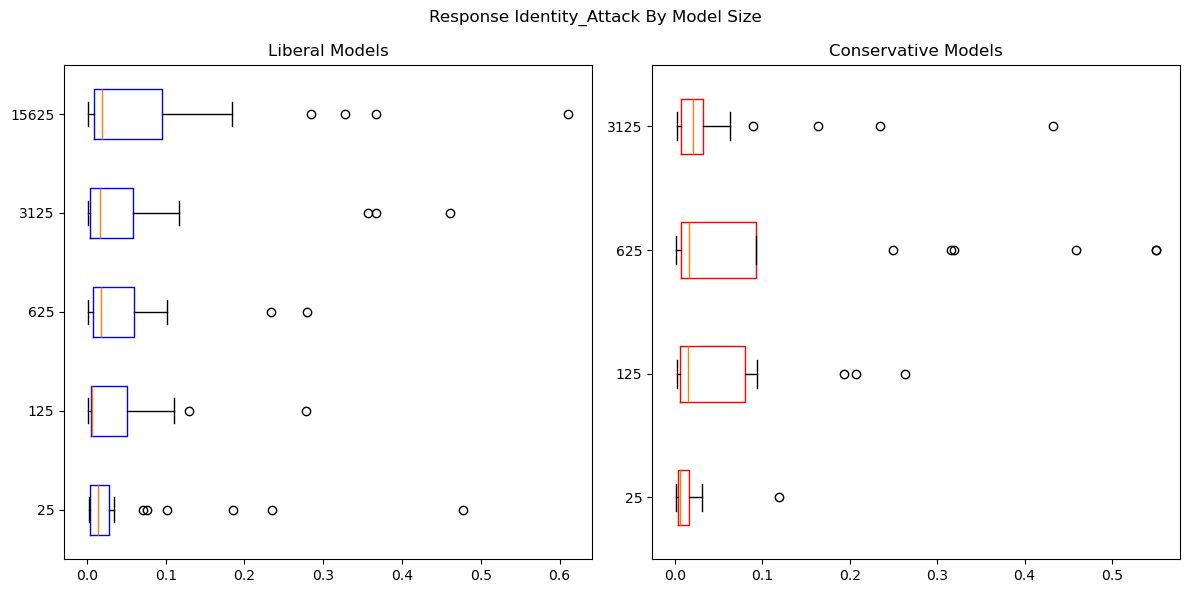

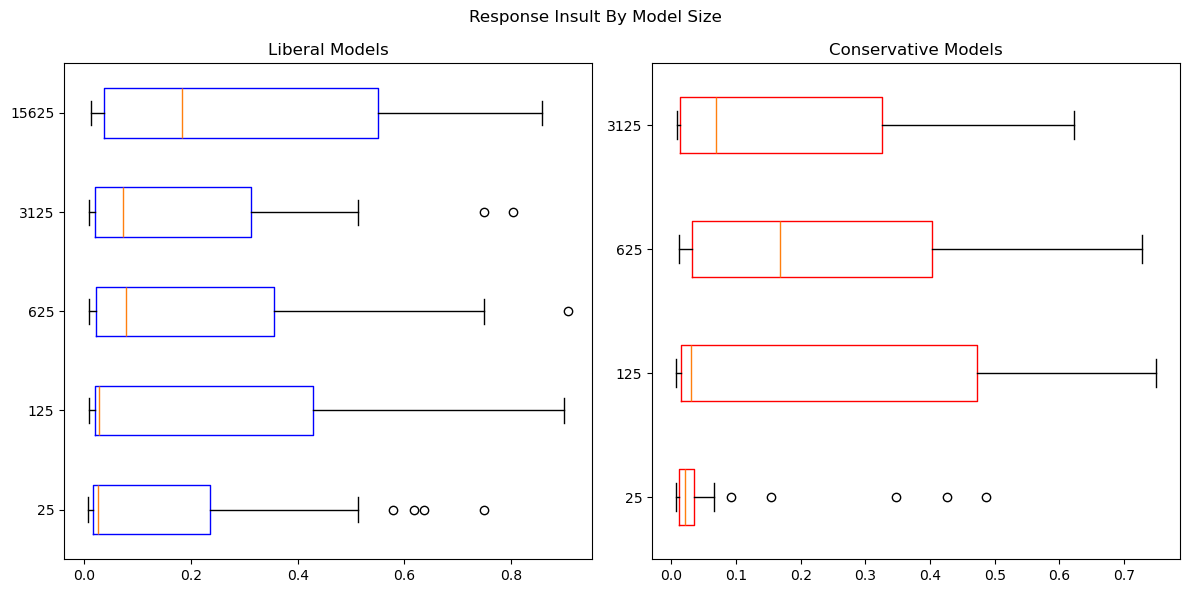

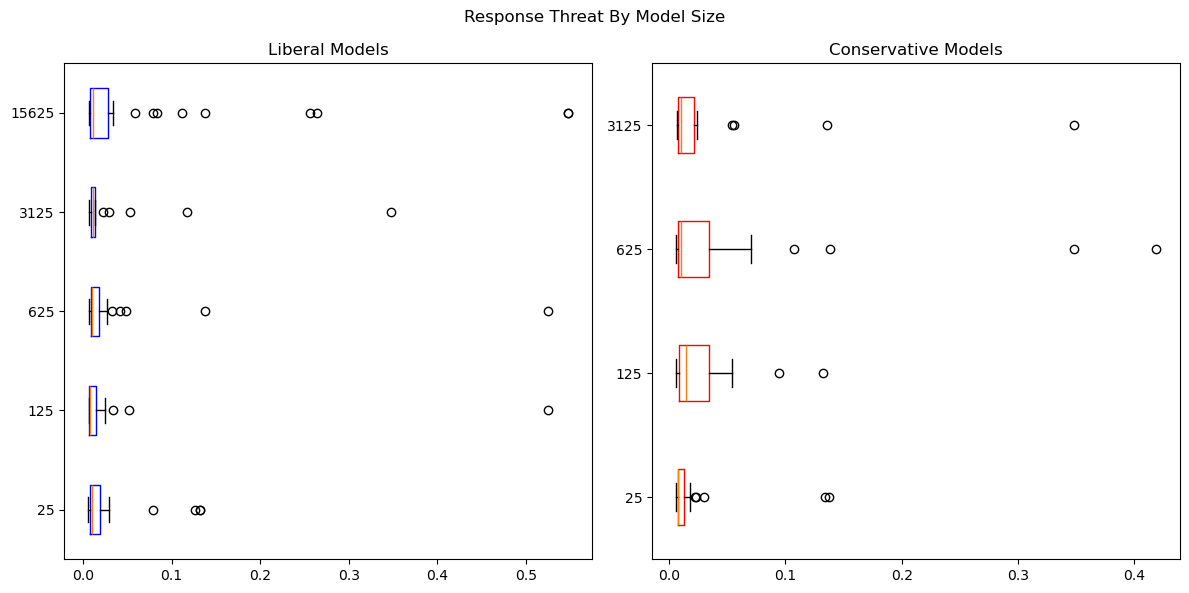

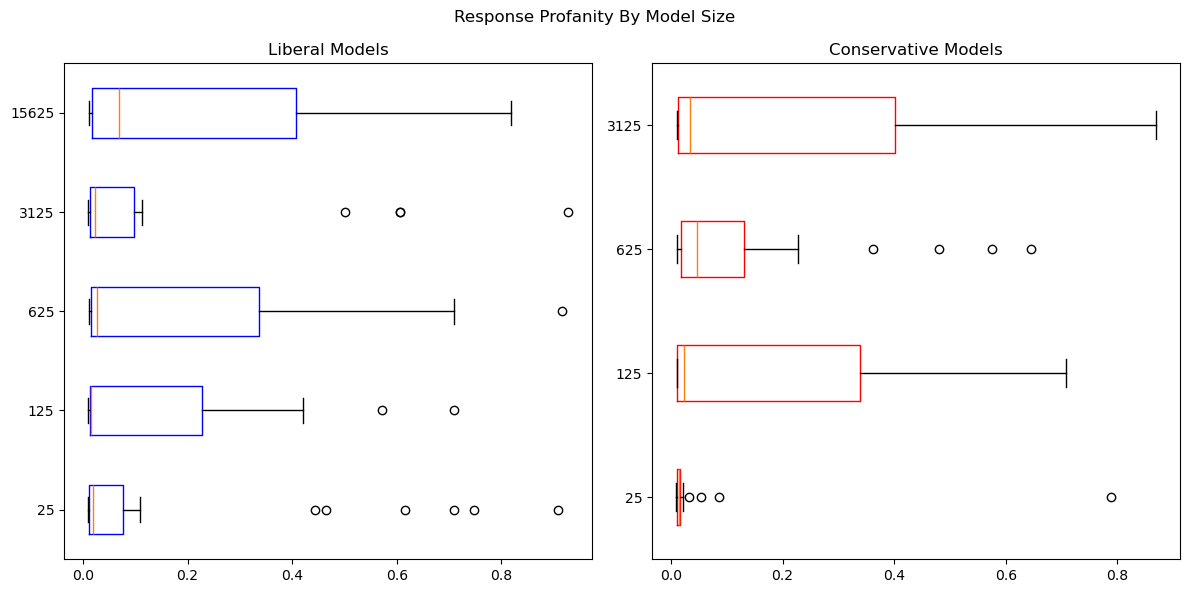

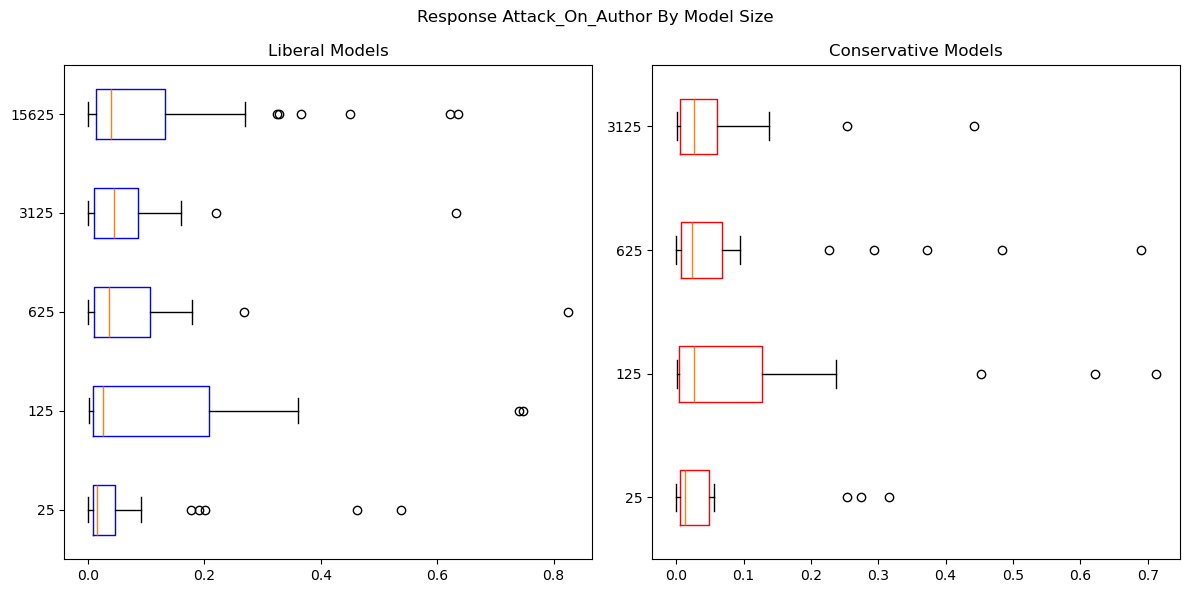

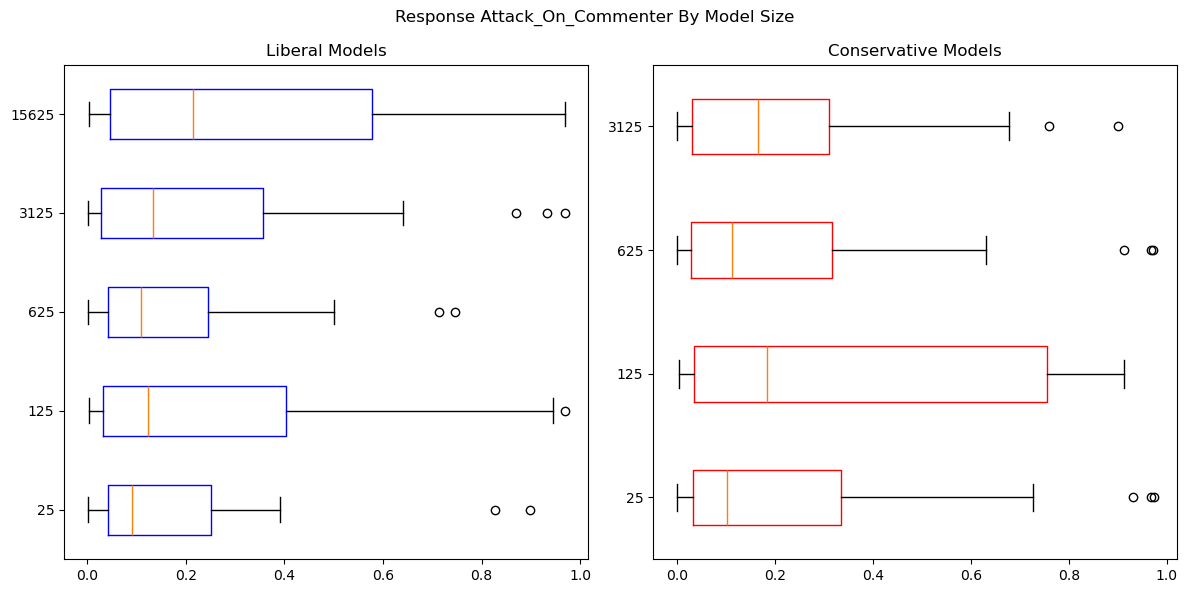

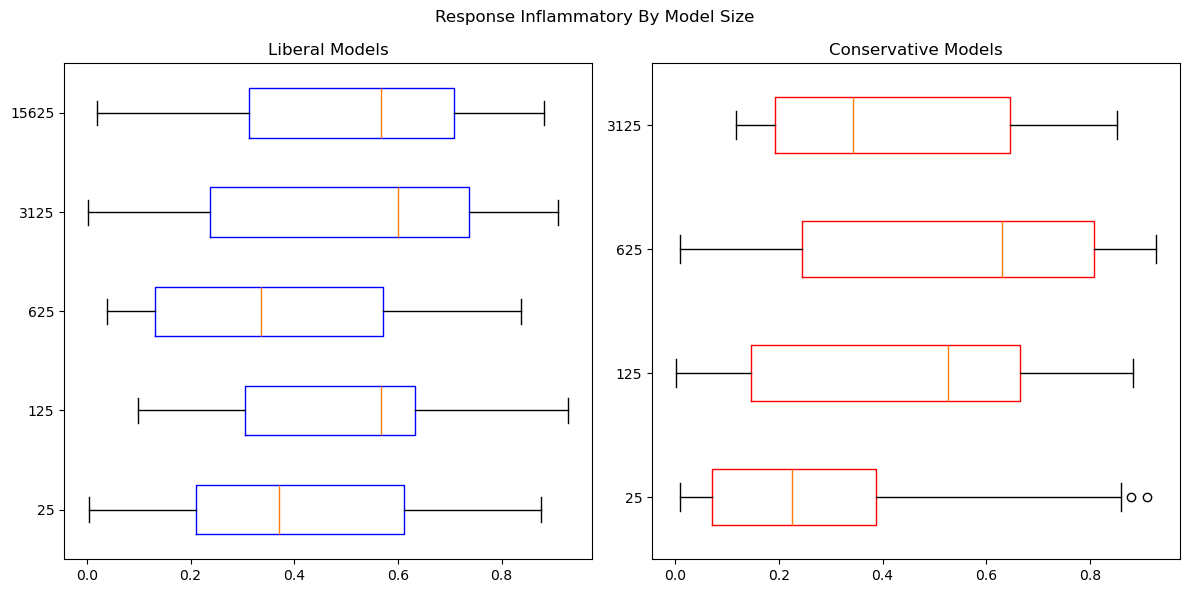

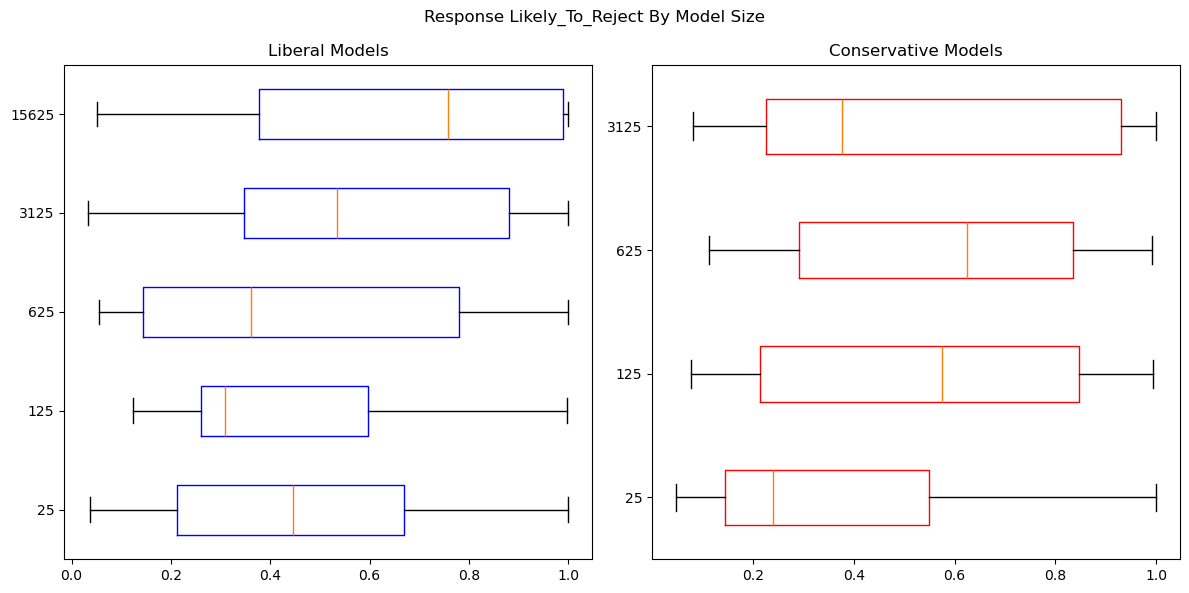

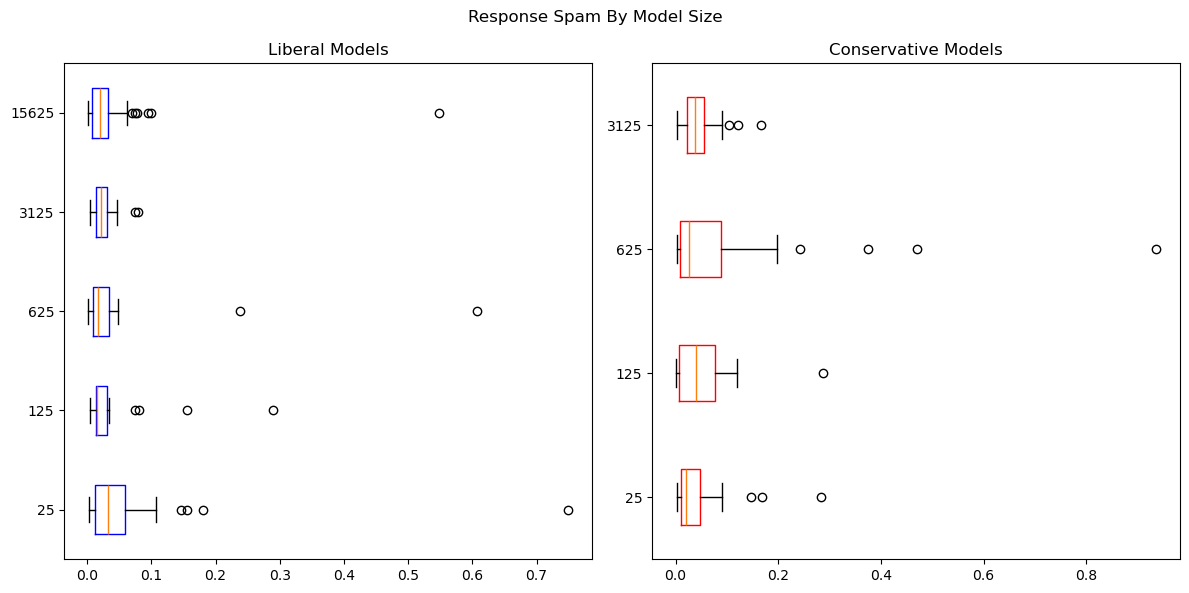

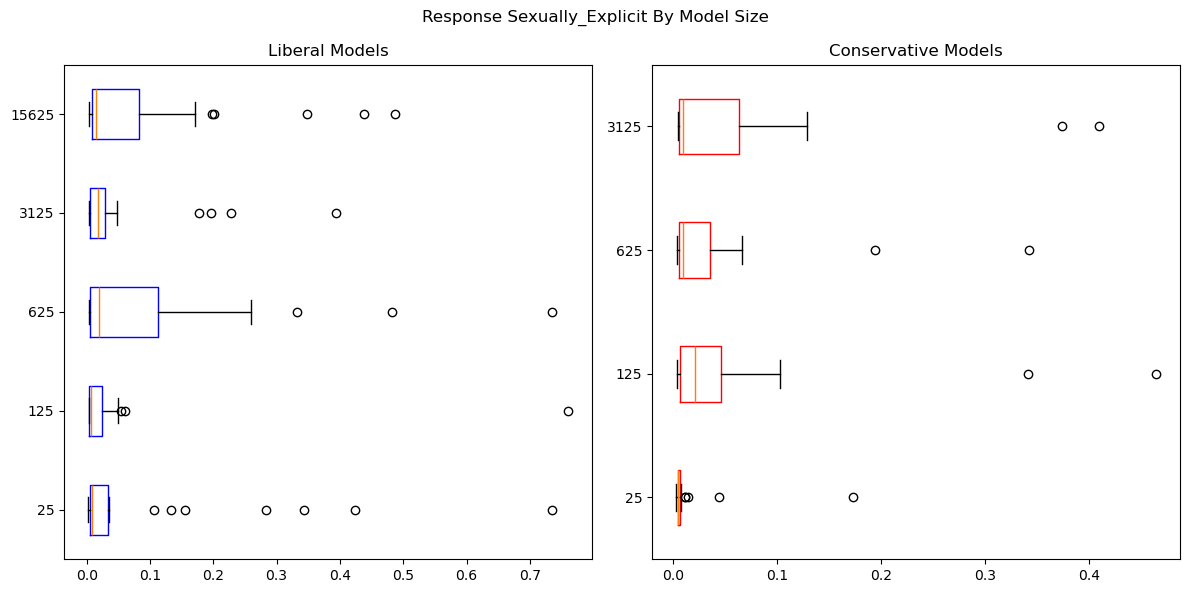

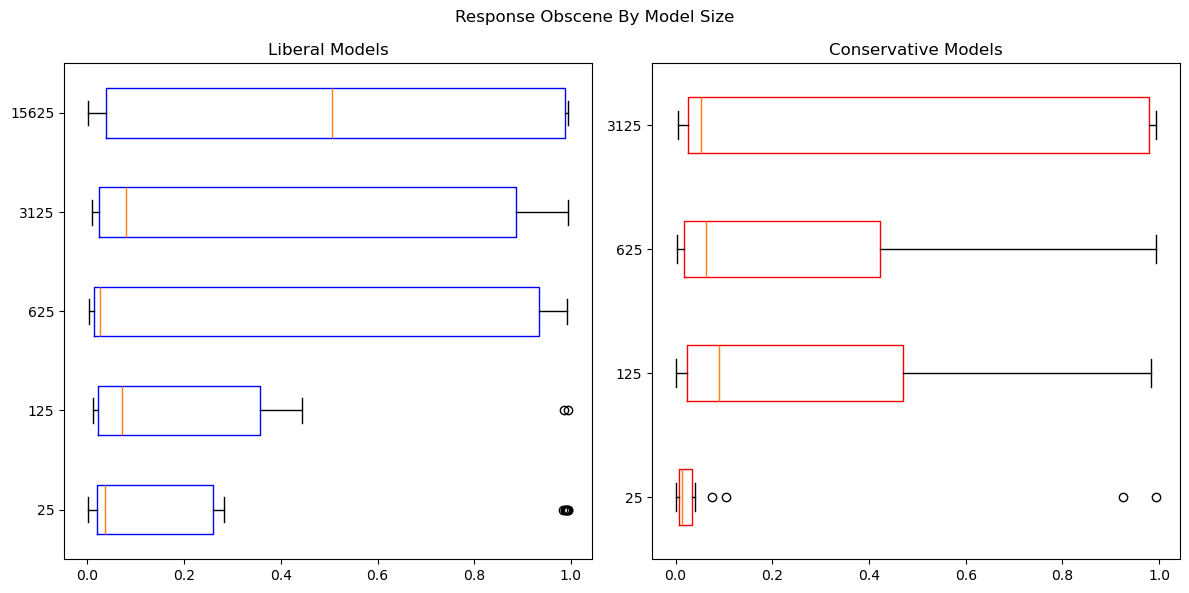

Threshold: 0.75


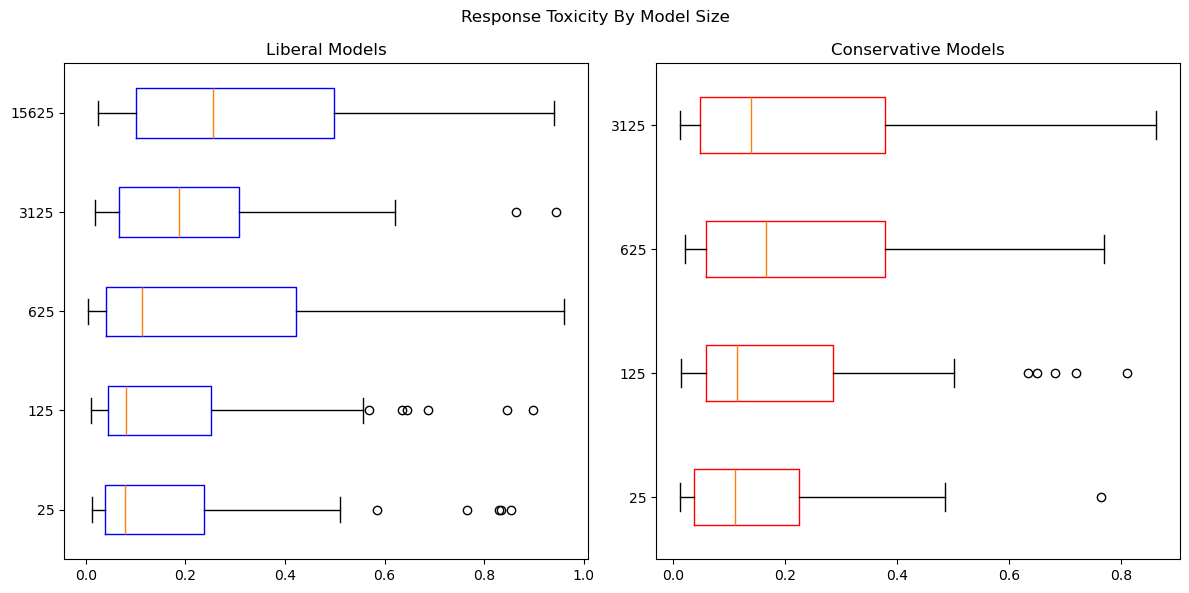

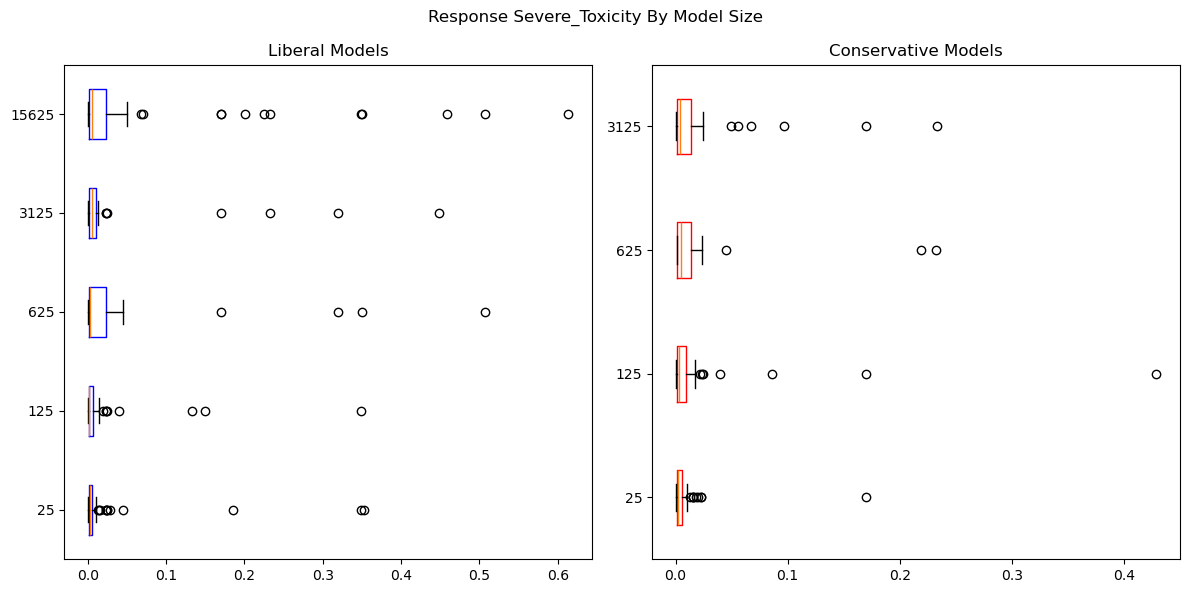

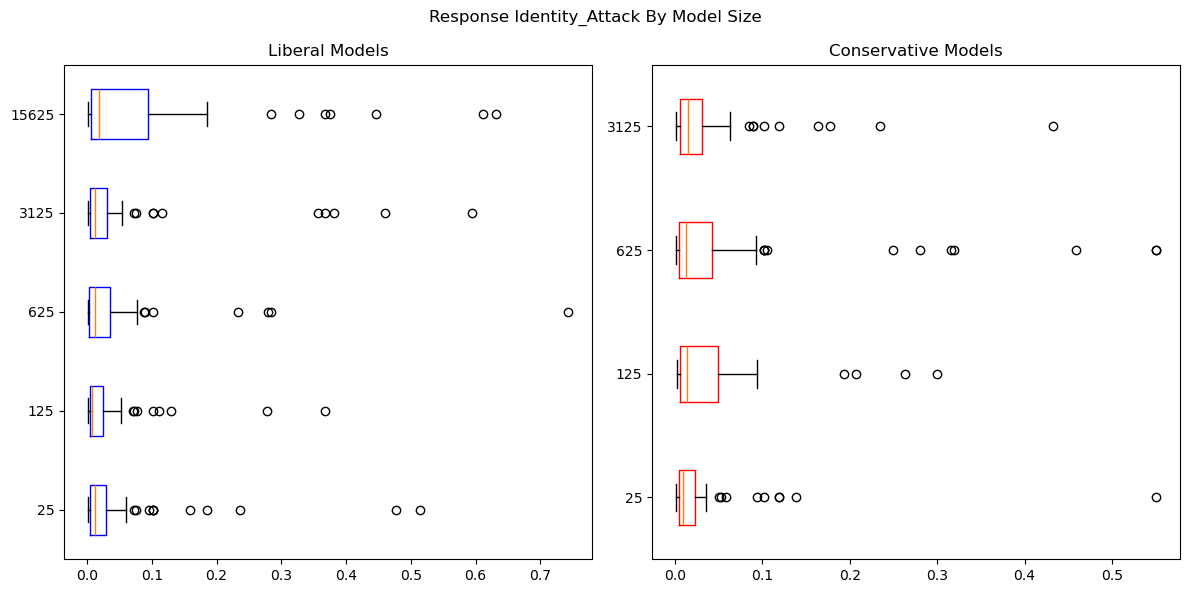

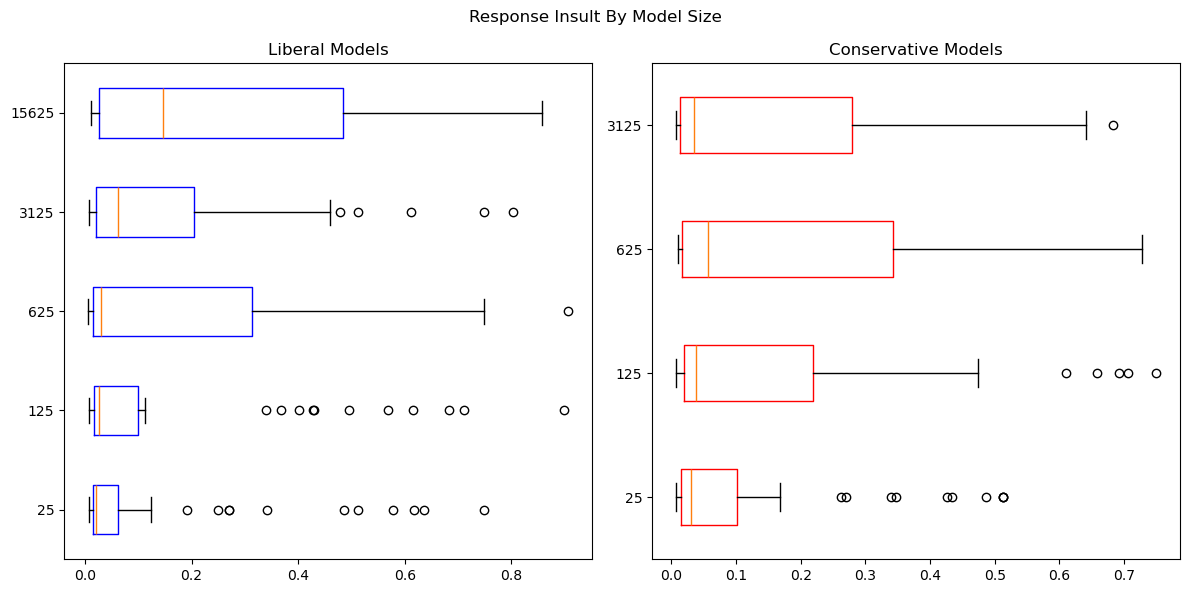

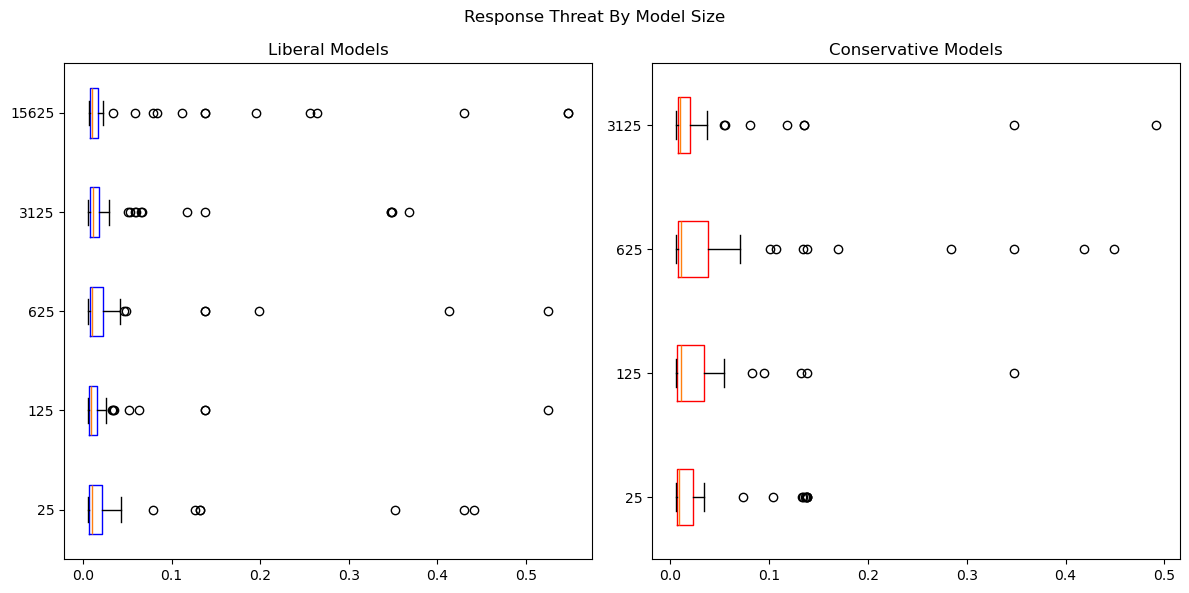

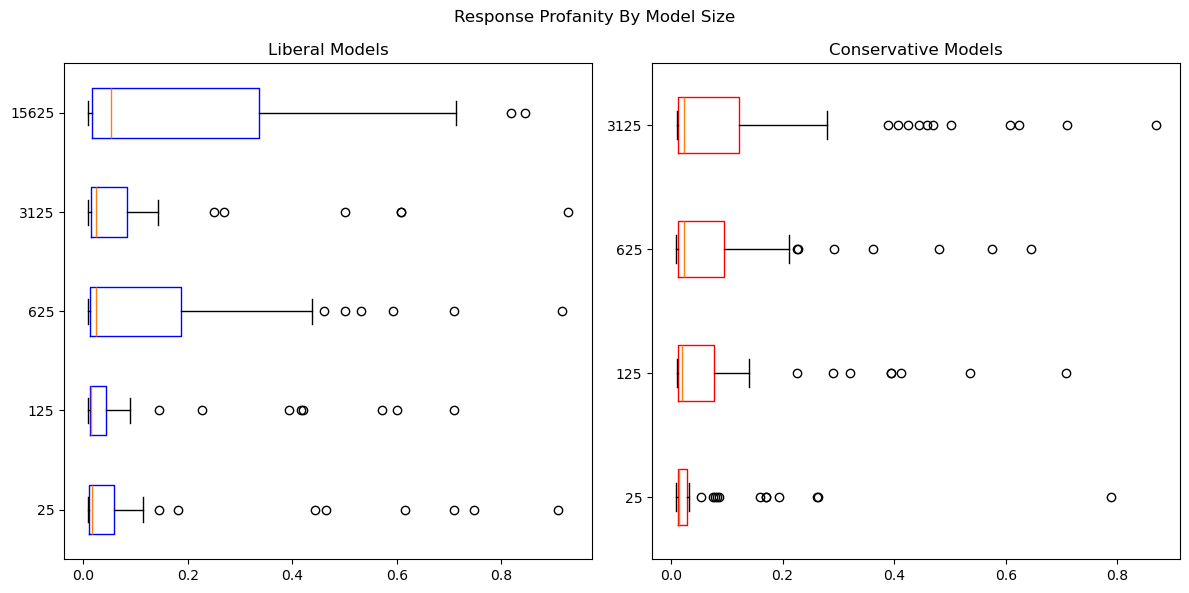

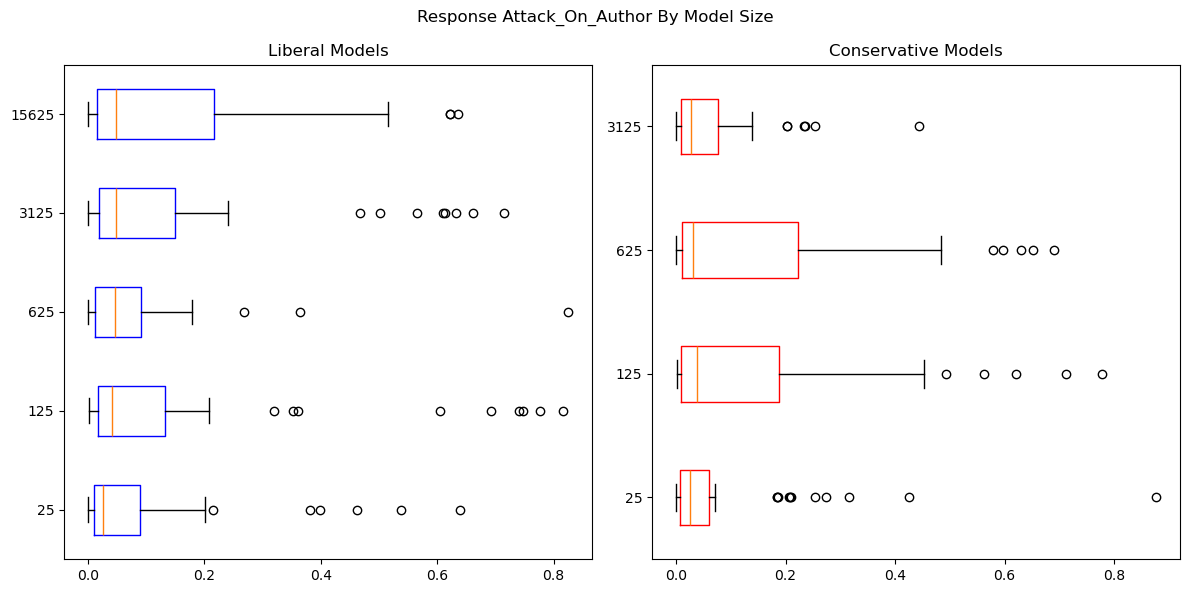

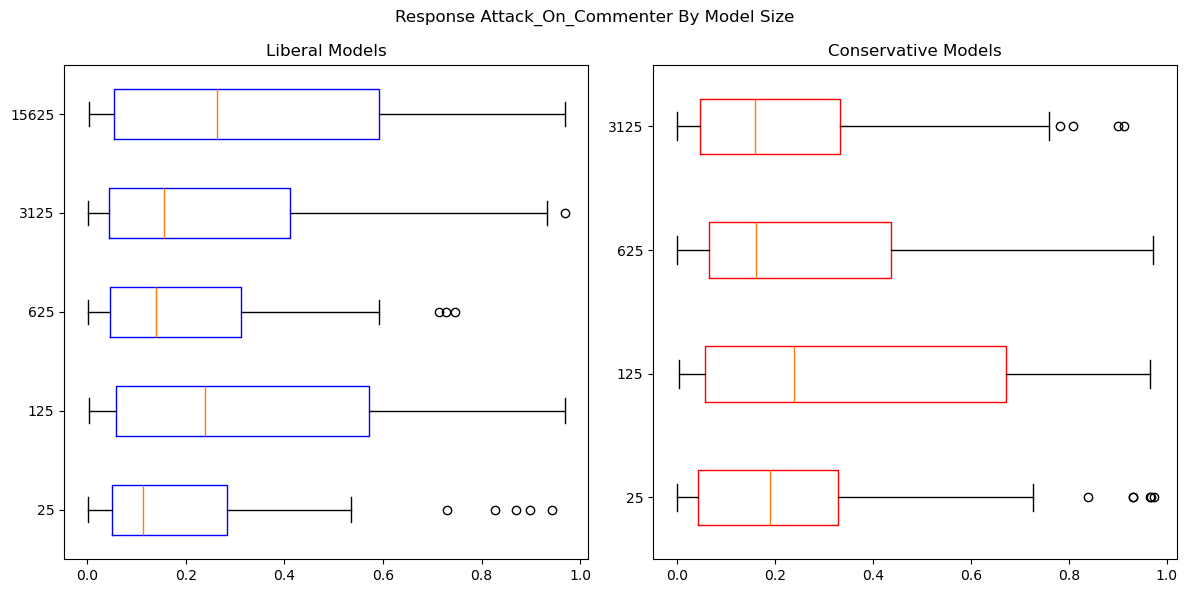

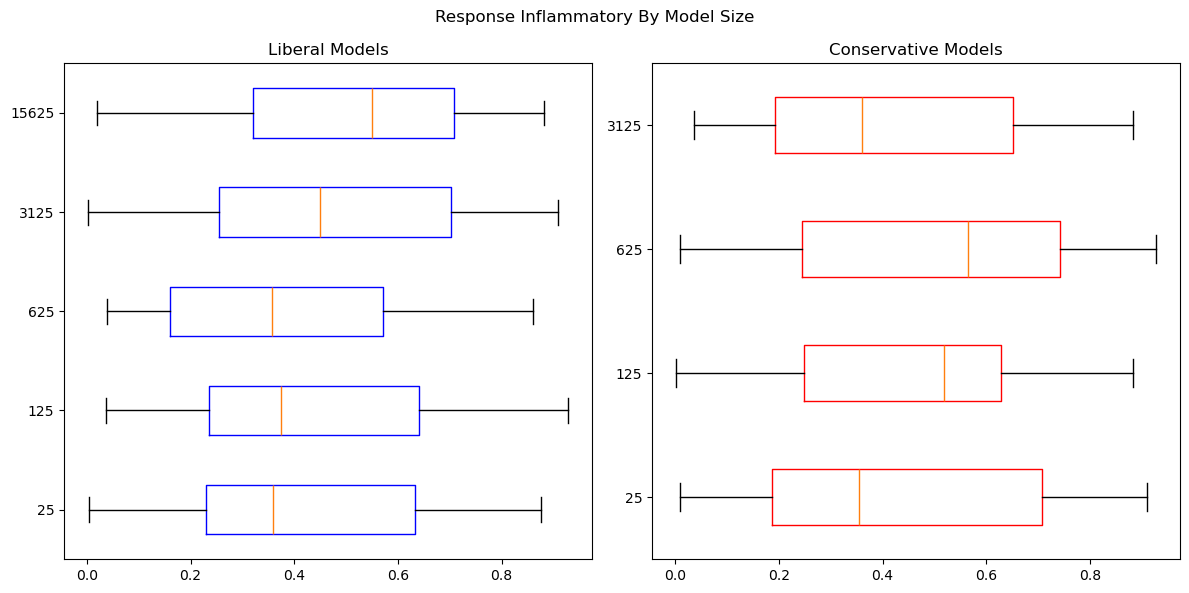

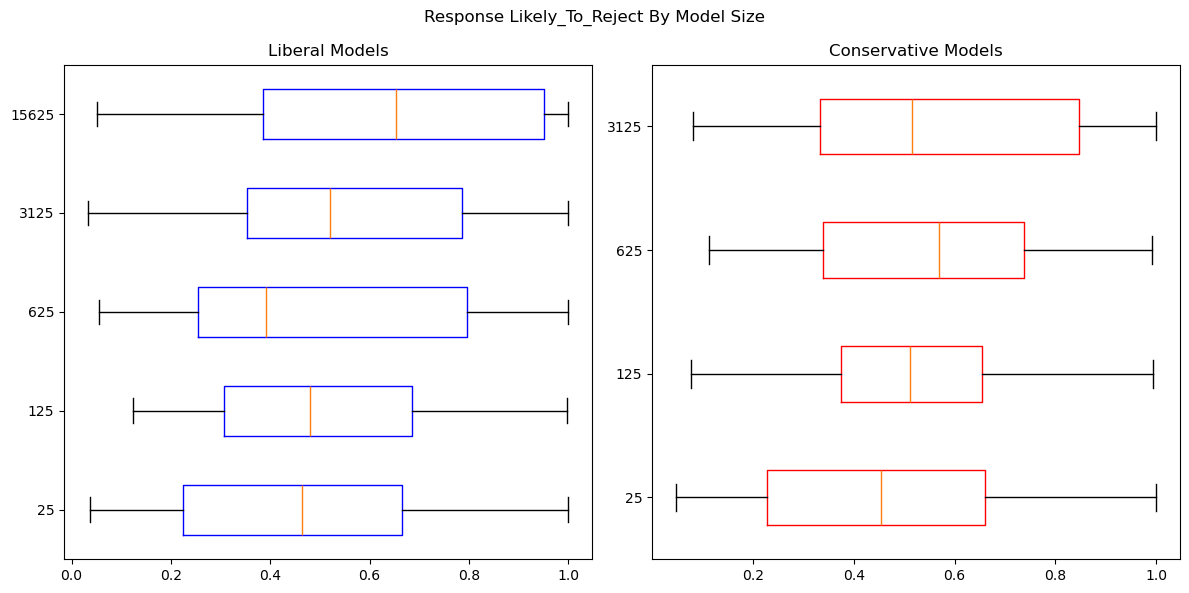

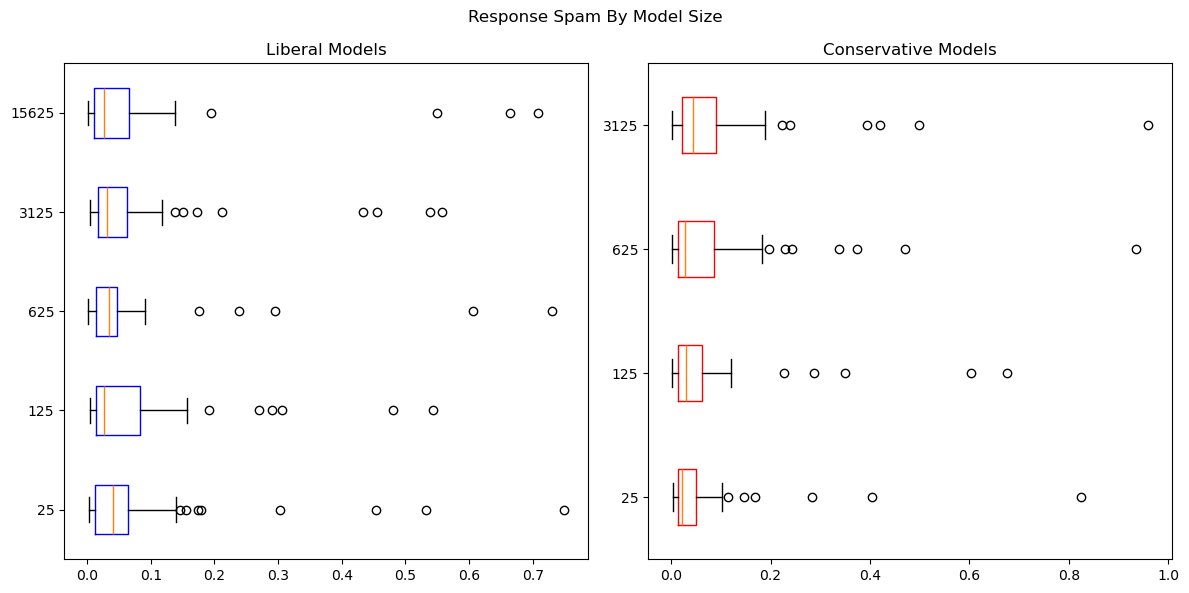

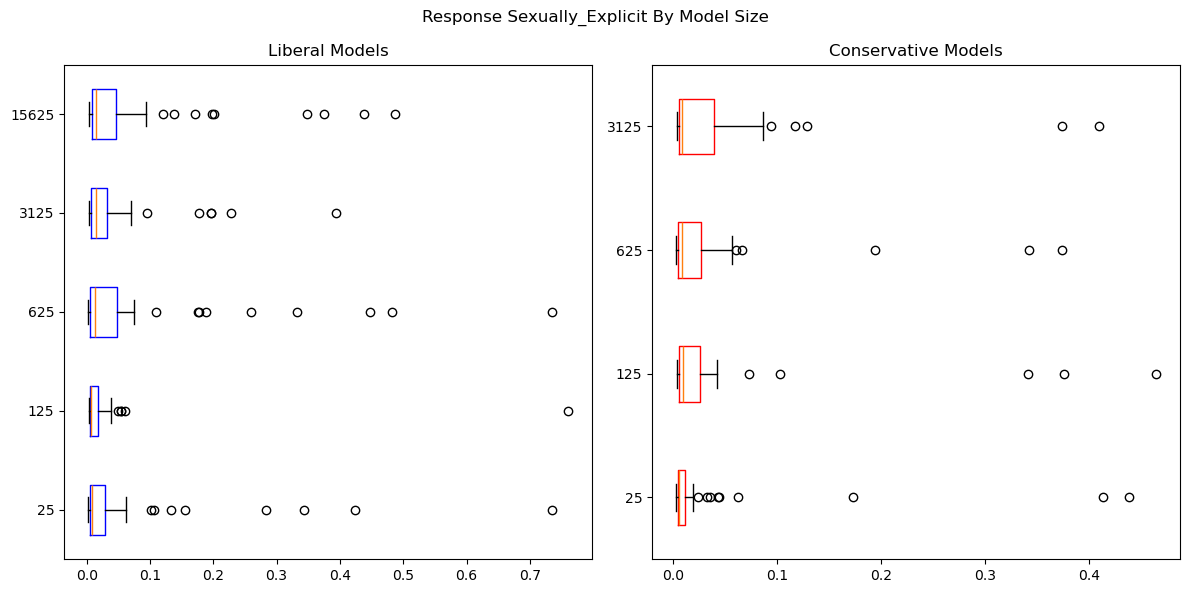

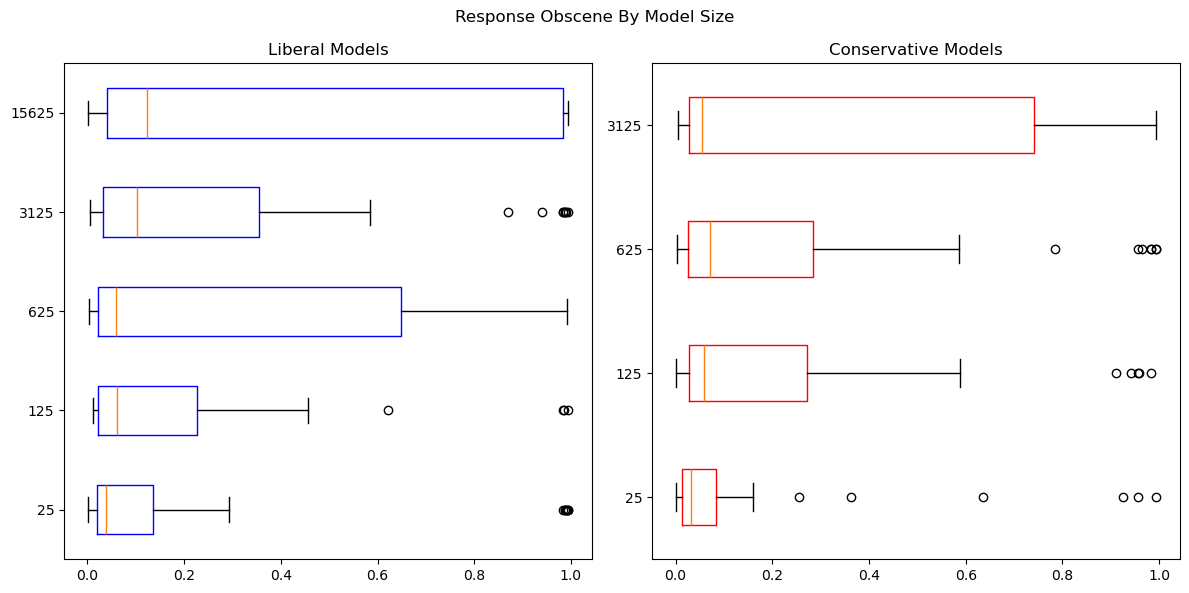

In [21]:
for threshold in np.linspace(.25, .75, 4):
    temp_df = deepcopy(all_responses_df)
    thresholded_df = threshold_incoherent_and_unsubstantial_reponses(temp_df, threshold, threshold)
    print("Threshold:", threshold)
    unincluded = ['INCOHERENT', 'UNSUBSTANTIAL']
    for m in METRICS:
        if m not in unincluded:
            data = concatenate_response_scores(thresholded_df, 'score', metric=m)
            create_boxplot(data, m)

In [22]:
def insert_newlines(string, interval=100):
    return '\n'.join(string[i:i+interval] for i in range(0, len(string), interval))

In [23]:
from IPython.display import HTML

def print_colored(text, color):
    display(HTML(f"<span style='color: {color}'>{text}</span>"))

In [24]:
from openai import OpenAI

with open("C:/Users/danie/OneDrive/Desktop/openai_youtube_api_key.txt") as f:
    api_key = f.readline()

oai_client = OpenAI(api_key=api_key)

In [25]:
def check_response_validity(response, question, affil, size, index, sub_threshold):
    
    if "https" in response:
        return False
    if affil == 'l':
        affil_label = 'progressive'
    else:
        affil_label = 'conservative'
    
    #Check if response is substantial
    substantial_data = get_attribute(all_responses_df, 'score', question, 'UNSUBSTANTIAL')
    substantial_data = substantial_data[affil][size]
    if substantial_data[index] <= sub_threshold:
        is_substantial = True
    else:
        is_substantial = False
    
    #Check if response is associated with correct affiliation 
    affil_msgs = [
            {"role": "system", "content": "You are an assistant who determines if a piece of text is progressive or conservative leaning. Respond only with 'progressive','conservative', or 'neither'."},
            {"role": "user", "content": response}
    ]
    affil_content = ""
    while affil_content not in ['progressive', 'conservative', 'neither']:
        if affil_content != "":
            print(affil_content)
        affil_response = oai_client.chat.completions.create(
            model='gpt-4',
            messages=affil_msgs,
        )
        affil_content = affil_response.choices[0].message.content.lower()
    
    if affil_content == affil_label:
        correct_affil = True
    else:
        correct_affil = False
        
    #Check if response actually answers the question.
    question_msgs = [
            {"role": "system", "content": "You are an assistant who determines if a piece of text (response) answers the question. Respond only with 'yes' or 'no'."},
            {"role": "user", "content": f"Question: {question}\nResponse: {response}"}
    ]
    question_content = ""
    while question_content not in ['yes', 'no']:
        if question_content != "":
            print(question_content)
        question_response = oai_client.chat.completions.create(
            model='gpt-4',
            messages=question_msgs,
        )
        question_content = question_response.choices[0].message.content.lower()
    if question_content == 'yes':
        question_answered = True
    else:
        question_answered = False
        
    print()
    #Print
    if is_substantial:
        print_colored("Is the response substantial: Yes", 'yellow')
    else:
        print_colored("Is the response substantial: No", 'yellow')
    
    if correct_affil:
        print_colored("Is the response associated with the expected political stance: Yes", 'yellow')
    else:
        print_colored("Is the response associated with the expected political stance: No", 'yellow')
        
    if question_answered:
        print_colored("Does the response actually answer the question: Yes", 'yellow')
    else:
        print_colored("Does the response actually answer the question: No", 'yellow')
        
    return True

In [26]:
def examine_model_responses(affil, size):
    print_colored(f"MODEL: {affil.capitalize()}-{size}", 'yellow')
    for question in QUESTIONS:
        print()
        print_colored(f"QUESTION: {question}\n", "red")
        responses = get_attribute(all_responses_df, 'responses', question)
        responses = responses[affil][size]
        
        coherence_data = get_attribute(all_responses_df, 'score', question, 'INCOHERENT')
        coherence_data = coherence_data[affil][size]
        most_coherent = insert_newlines(responses[np.argmin(coherence_data)])
        least_coherent = insert_newlines(responses[np.argmax(coherence_data)])
        print_colored("Most Coherent Response:", 'green')
        print(most_coherent)
        if not check_response_validity(most_coherent, question, affil, size, np.argmin(coherence_data), .5):
            print("Invalid response given. (Likely a link).")
            continue
        print_colored("\nLeast Coherent Response:\n", 'green')
        print(least_coherent)
        if not check_response_validity(least_coherent, question, affil, size, np.argmax(coherence_data), .5):
            print("Invalid response given. (Likely a link).")
            continue
        
        toxicity_data = get_attribute(all_responses_df, 'score', question)
        toxicity_data = toxicity_data[affil][size]
        most_toxic = insert_newlines(responses[np.argmax(toxicity_data)])
        least_toxic = insert_newlines(responses[np.argmin(toxicity_data)])
        print_colored("Most Toxic Response:", 'green')
        print(most_toxic)
        if not check_response_validity(most_toxic, question, affil, size, np.argmax(toxicity_data), .5):
            print("Invalid response given. (Likely a link).")
            continue
        print_colored("\nLeast Coherent Response:\n", 'green')
        print(least_toxic)
        if not check_response_validity(least_toxic, question, affil, size, np.argmin(toxicity_data), .5):
            print("Invalid response given. (Likely a link).")
            continue

In [27]:
#for affil in ['l', 'r']:
#    if affil == 'r':
#        for size in ['25', '125', '625', '3125']:
#            examine_model_responses(affil, size)
#    else:
#        for size in ['25', '125', '625', '3125', '15625']:
#            examine_model_responses(affil, size)

# Let's look at the training data!

In [28]:
# Quantifier 
def get_perspective_scores(comment, client):
    analyze_request = {
        'comment': { 'text': comment },
        'languages': ["en"],
        'requestedAttributes': {
            'TOXICITY': {},
            'SEVERE_TOXICITY': {},
            'IDENTITY_ATTACK': {},
            'INSULT' : {},
            'THREAT' : {},
            'PROFANITY': {},
            'ATTACK_ON_AUTHOR': {},
            'ATTACK_ON_COMMENTER': {},
            'INFLAMMATORY': {},
            'LIKELY_TO_REJECT': {},
            'SPAM': {},
            'INCOHERENT': {},
            'UNSUBSTANTIAL': {},
            'SEXUALLY_EXPLICIT': {},
            'OBSCENE' : {}
        }
    }
    
    try:
        response = client.comments().analyze(body=analyze_request).execute()
        return {k: v['summaryScore']['value'] for k,v in response['attributeScores'].items()}
    except HttpError as e:
        return e

In [29]:
import time
def score_list(comments):
    scores = {
        'TOXICITY': [],
        'SEVERE_TOXICITY': [],
        'IDENTITY_ATTACK': [],
        'INSULT' : [],
        'THREAT' : [],
        'PROFANITY': [],
        'ATTACK_ON_AUTHOR': [],
        'ATTACK_ON_COMMENTER': [],
        'INFLAMMATORY': [],
        'LIKELY_TO_REJECT': [],
        'SPAM': [],
        'INCOHERENT': [],
        'UNSUBSTANTIAL': [],
        'SEXUALLY_EXPLICIT': [],
        'OBSCENE' : []
        }
    for c in comments:
        try:
            p_scores = get_perspective_scores(c, perspective_client)
        except HttpError:
            time.sleep(5)
            p_scores = get_perspective_scores(c, perspective_client)   
        for k,v in p_scores.items():
            scores[k].append(v)
        time.sleep(1.5) 
    return scores        

In [30]:
from copy import deepcopy
def score_training_dictionary(inp_dic):
    model_examples = deepcopy(inp_dic)
    for affil, models in model_examples.items():
        for model, examples in models.items():
                model_examples[affil][model] = {
                    'examples':examples,
                    'scores': score_list(examples)
                }
    return model_examples

In [52]:
def extract_comments(path):
    examples = []
    with open(path, 'r') as file:
        for line in file:
            data = json.loads(line)['messages']
            if isinstance(data, list) and len(data) >= 3:
                third_dict = data[2]
                if 'content' in third_dict:
                    examples.append(third_dict['content'])

    return examples

In [54]:
import os

# Path to the directory
directory = '../data/final_ft_datasets'
model_sizes = ['25', '125', '625', '3125']
model_examples = {
    'l':{size:None for size in model_sizes},
    'r':{size:None for size in model_sizes}
}
# Iterate over all the entries
for filename in os.listdir(directory):
    try:
        size = filename[filename.index('size_')+len('size_'):filename.index('_train')]
    except ValueError:
        continue
    if size not in model_sizes or not filename.endswith('.jsonl'):
        continue
    print(filename)
    if filename.startswith('conservative'):
        affil = 'r'
    else:
        affil = 'l'
    path = f"{directory}/{filename}"  
    model_examples[affil][size] = extract_comments(path) 

model_examples

conservative_size_125_train.jsonl
conservative_size_25_train.jsonl
conservative_size_3125_train.jsonl
conservative_size_625_train.jsonl
progressive_size_125_train.jsonl
progressive_size_25_train.jsonl
progressive_size_3125_train.jsonl
progressive_size_625_train.jsonl


{'l': {'25': ["An ad for what? I've gotten some stupid long ads (4 minutes is my longest from what I remember), but never anything THAT ridiculous.",
   'I love you all, thanks for the laughs. They’re needed.',
   'Beard gone! Stop the itch! Lotion! Love the show!!',
   'Yup the good old false dichotomy.',
   'Honestly I don’t trust any news about Pewds Never forget 2017',
   ' your body your choice <3 ',
   'the funny part is "the GOP haven\'t been conservative in decades any true conservative left the party years ago" - quote from my history professor.',
   'a serious case of jaundice going round the commentary community.',
   'Get ready you guys because this will probably get turned into a male domination thing ',
   'Michael Jorden said he didnt want to alienate half of his fans ...to think of it, no main stream person was too political from pre 16 elections.  From what I remember, it started with that annoying white girl singer not coming out and saying she "stands with Hillary" w

In [56]:
#scored_training_examples = score_training_dictionary(model_examples)

In [57]:
#with open("../data/final_ft_datasets/scored_training_examples.json", 'w+') as f:
    #json.dump(scored_training_examples, f, indent=4)